In [1]:
import os 
import pandas as pd 
import sys 
import re 
import numpy as np 
import torch
current_path = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_path, '..','..','..'))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)
    
from jupyter_ipynb.NetMob_training_analysis.plotting import plot_boxplot_on_metric
from experiences.convert_df_to_latex import update_df_metrics,load_csv
from experiences.convert_df_to_latex import tackle_trial_j as tackle_trial_for_distrib
from experiences.common_results import dic_exp_to_names,dic_trials,folder_path,metrics

exp_i = 'Exp6_subway_netmob'
# exp_i = 'Exp6_bike_netmob'

trials = dic_trials[exp_i]


print(f"\n------------------ {exp_i} ---")
metrics = ['rmse','mae','mase']
L_metrics = []

def tackle_trial_for_distrib(folder_path,dic_exp_to_names,L_metrics,exp_i,trial_j,metrics):
    df_j_all = pd.DataFrame()
    metric_i = []
    for n_bis in range(1,6):
        df_j_all, metric_i = load_csv(folder_path,dic_exp_to_names,exp_i,trial_j,n_bis,df_j_all,metric_i,metrics)
    
    if len(metric_i) > 0: 
        metric_i = pd.DataFrame(metric_i)
        metric_i.index = [f"{trial_j}_bis{n_bis}" for n_bis in range(1,6)]
        L_metrics.append(metric_i)

    return L_metrics


for trial_j in trials:
    L_metrics = tackle_trial_for_distrib(folder_path,dic_exp_to_names,L_metrics,exp_i,trial_j,metrics)

df_metrics_all = pd.concat(L_metrics)

horizons = list(set([c.split('_')[-1][1:] for c in df_metrics_all.columns]))
for horizon in horizons:
    print('\n---------------')
    print(f"Horizon: {horizon}")
    df_horizon = df_metrics_all[[c for c in df_metrics_all.columns if c.endswith(f"_h{horizon}")]].dropna()

    df_horizon = update_df_metrics(df_horizon,exp_i)

    plot_boxplot_on_metric(df_horizon, metric_i='mae', xaxis_label="Config", legend_group='legend_group', width=1200, height=800, 
                                save_path=None)
    # plot_boxplot_on_metric(df_horizon, metric_i='mase', xaxis_label="Config", legend_group='legend_group', width=1200, height=400, 
    #                             save_path=None)
    plot_boxplot_on_metric(df_horizon, metric_i='rmse', xaxis_label="Config", legend_group='legend_group', width=1200, height=800, 
                                save_path=None)


------------------ Exp6_subway_netmob ---

---------------
Horizon: 4


Loading BokehJS ...

Loading BokehJS ...


---------------
Horizon: 1


Loading BokehJS ...

Loading BokehJS ...

/root/anaconda3/envs/pytorch-2.0.1/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


No module xgboost
Training and Hyper-parameter tuning with Ray is not possible
Training and Hyper-parameter tuning with Ray is not possible

Trial ID 1:  _STAEformer_subway_in_calendar_trial2__e150_h1_bis1_f5
Trial ID 2:  _STAEformer_subway_in_calendar__e150_h1_bis1_f5
model_save_path for trial id1:  /home/rrochas/prediction-validation/save/K_fold_validation/training_wo_HP_tuning/Exp6_subway_netmob/subway_in_STAEformer/best_models/STAEformer_subway_in_calendar_trial2__e150_h1_bis1_f5.pkl
----------------------------------------
Loading the Complete Dataset for K-fold splitting
Coverage Period: 7392 elts between 2019-03-16 00:00:00 and 2019-05-31 23:45:00
Invalid dates within this fold: 776

>>>Tackle Target dataset: subway_in
   Load data from: //home/rrochas/../../data/rrochas/prediction_validation/subway_in/subway_in.csv
   Init Dataset: 'torch.Size([7392, 40]). 0 Nan values
   TRAIN contextual_ds: torch.Size([2821, 40, 7])
   VALID contextual_ds: torch.Size([940, 40, 7])
   TEST con

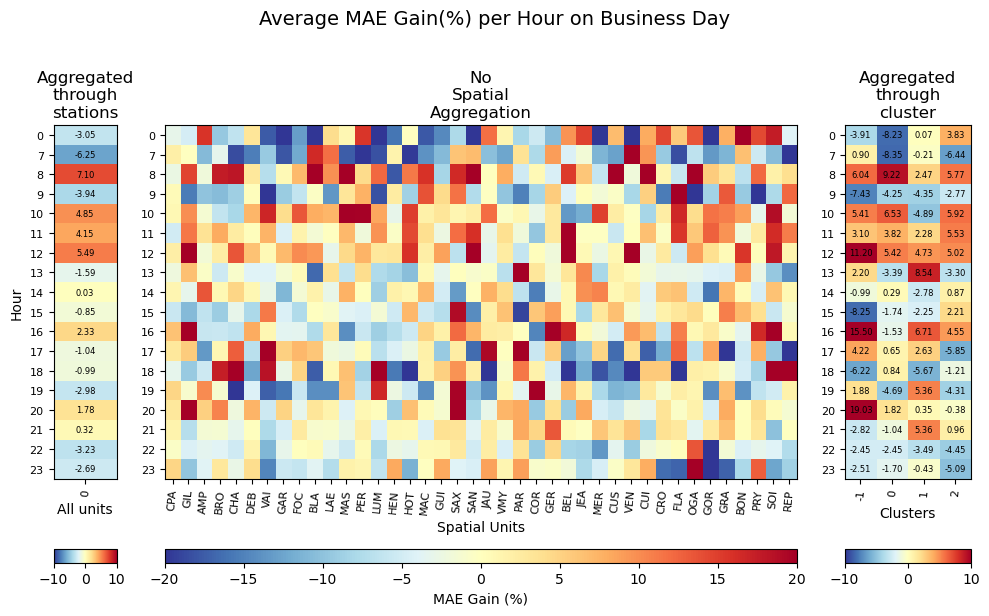

Performance on each trial : 
-----------------------
MAE
   (baseline)  / mean MAE:   [21.47192  20.933304 21.204874 21.8624   21.521952]  //  21.39889
   (config)    / mean MAE:   [22.757435 21.811853 21.85755  22.109432 21.44222 ]  //  21.995697  // (2.79%)  

RMSE
   (baseline)  / mean RMSE:  [36.23506  35.445946 36.080387 36.686058 36.074673]  //  36.104424
   (config)    / mean RMSE:  [38.17872  37.21041  37.669357 37.235302 36.13153 ]  //  37.285065  // (3.27%) 

Trial ID 1:  _STAEformer_subway_in_calendar_trial2__e150_h1_bis1_f5
Trial ID 2:  _STAEformer_subway_in_netmob_POIs_calendar_late_fusion_Google_Maps_Deezer_CrossAttnBackBone_InEmb24_ctxInEmb24_adp16_adpQ24_aggIris100__e150_h1_bis1_f5
model_save_path for trial id1:  /home/rrochas/prediction-validation/save/K_fold_validation/training_wo_HP_tuning/Exp6_subway_netmob/subway_in_STAEformer/best_models/STAEformer_subway_in_calendar_trial2__e150_h1_bis1_f5.pkl
----------------------------------------
Loading the Complete Dataset 

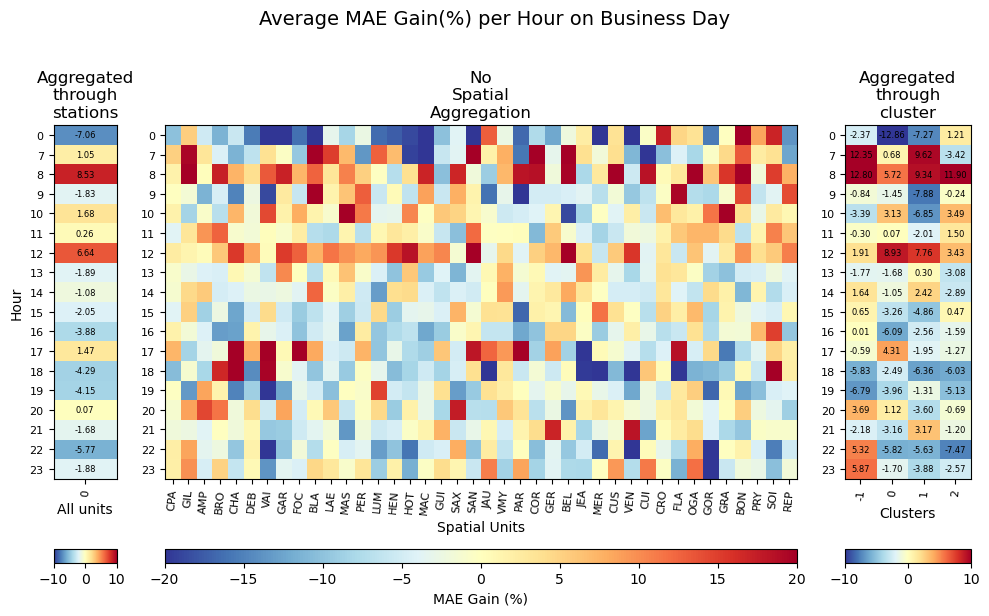

Performance on each trial : 
-----------------------
MAE
   (baseline)  / mean MAE:   [21.47192  20.933304 21.204874 21.8624   21.521952]  //  21.39889
   (config)    / mean MAE:   [21.045559 21.483164 21.560062 20.704617 21.328081]  //  21.224298  // (-0.82%)  

RMSE
   (baseline)  / mean RMSE:  [36.23506  35.445946 36.080387 36.686058 36.074673]  //  36.104424
   (config)    / mean RMSE:  [35.659462 36.044025 36.69557  34.78382  36.17398 ]  //  35.871376  // (-0.65%) 

Trial ID 1:  _STAEformer_subway_in_calendar_trial2__e150_h1_bis1_f5
Trial ID 2:  _STAEformer_subway_in_netmob_POIs_calendar_late_fusion_Google_Maps_Deezer_CrossAttnBackBone_InEmb24_ctxInEmb24_adp16_adpQ0_aggIris100__e150_h1_bis1_f5
model_save_path for trial id1:  /home/rrochas/prediction-validation/save/K_fold_validation/training_wo_HP_tuning/Exp6_subway_netmob/subway_in_STAEformer/best_models/STAEformer_subway_in_calendar_trial2__e150_h1_bis1_f5.pkl
----------------------------------------
Loading the Complete Dataset

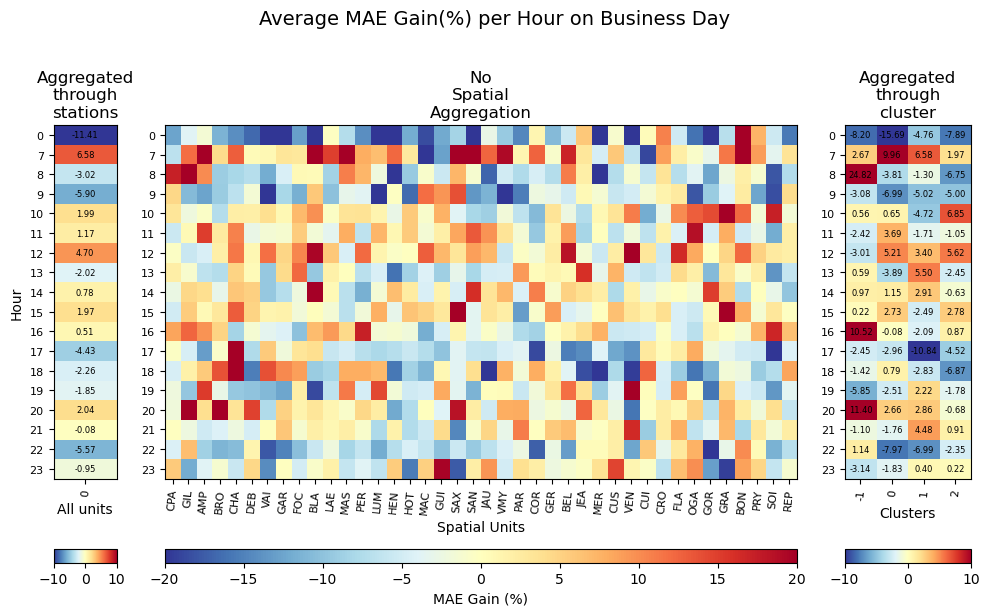

Performance on each trial : 
-----------------------
MAE
   (baseline)  / mean MAE:   [21.47192  20.933304 21.204874 21.8624   21.521952]  //  21.39889
   (config)    / mean MAE:   [21.393627 21.10502  22.273777 21.217623 21.200262]  //  21.43806  // (0.18%)  

RMSE
   (baseline)  / mean RMSE:  [36.23506  35.445946 36.080387 36.686058 36.074673]  //  36.104424
   (config)    / mean RMSE:  [36.108166 35.251095 37.740665 35.574234 35.602787]  //  36.05539  // (-0.14%) 

Trial ID 1:  _STAEformer_subway_in_calendar_trial2__e150_h1_bis1_f5
Trial ID 2:  _STAEformer_subway_in_netmob_POIs_calendar_late_fusion_Instagram_Deezer_CrossAttnBackBone_InEmb24_ctxInEmb24_adp16_adpQ24_aggIris100__e150_h1_bis1_f5
model_save_path for trial id1:  /home/rrochas/prediction-validation/save/K_fold_validation/training_wo_HP_tuning/Exp6_subway_netmob/subway_in_STAEformer/best_models/STAEformer_subway_in_calendar_trial2__e150_h1_bis1_f5.pkl
----------------------------------------
Loading the Complete Dataset for

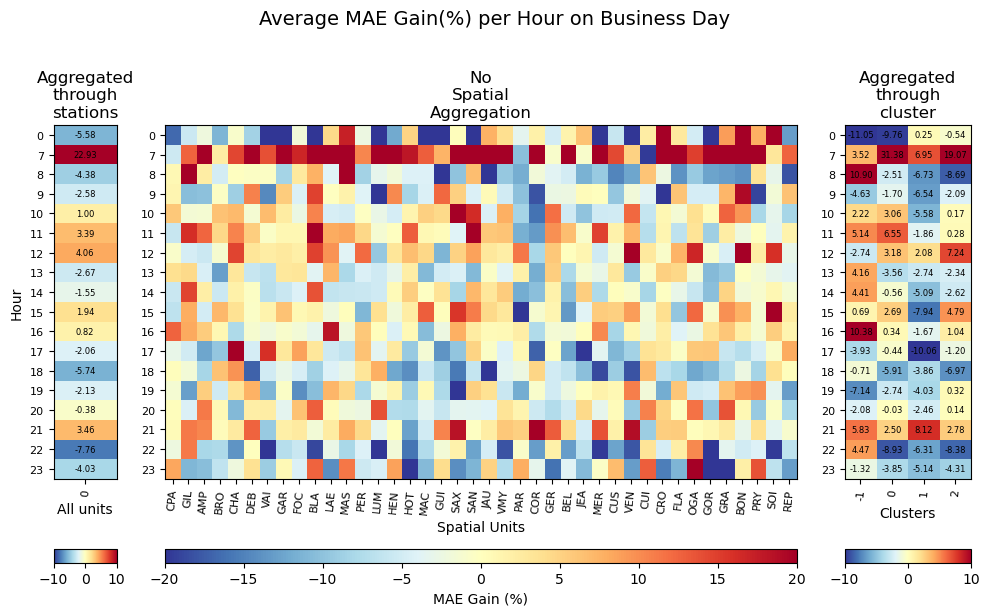

Performance on each trial : 
-----------------------
MAE
   (baseline)  / mean MAE:   [21.47192  20.933304 21.204874 21.8624   21.521952]  //  21.39889
   (config)    / mean MAE:   [22.501373 21.168745 21.025856 21.086473 21.348616]  //  21.426212  // (0.13%)  

RMSE
   (baseline)  / mean RMSE:  [36.23506  35.445946 36.080387 36.686058 36.074673]  //  36.104424
   (config)    / mean RMSE:  [37.911545 35.749702 35.73744  35.44239  35.74627 ]  //  36.11747  // (0.04%) 

Trial ID 1:  _STAEformer_subway_in_calendar_trial2__e150_h1_bis1_f5
Trial ID 2:  _STAEformer_subway_in_netmob_POIs_calendar_late_fusion_Instagram_Deezer_CrossAttnBackBone_InEmb24_ctxInEmb24_adp16_adpQ0_aggIris100__e150_h1_bis1_f5
model_save_path for trial id1:  /home/rrochas/prediction-validation/save/K_fold_validation/training_wo_HP_tuning/Exp6_subway_netmob/subway_in_STAEformer/best_models/STAEformer_subway_in_calendar_trial2__e150_h1_bis1_f5.pkl
----------------------------------------
Loading the Complete Dataset for 

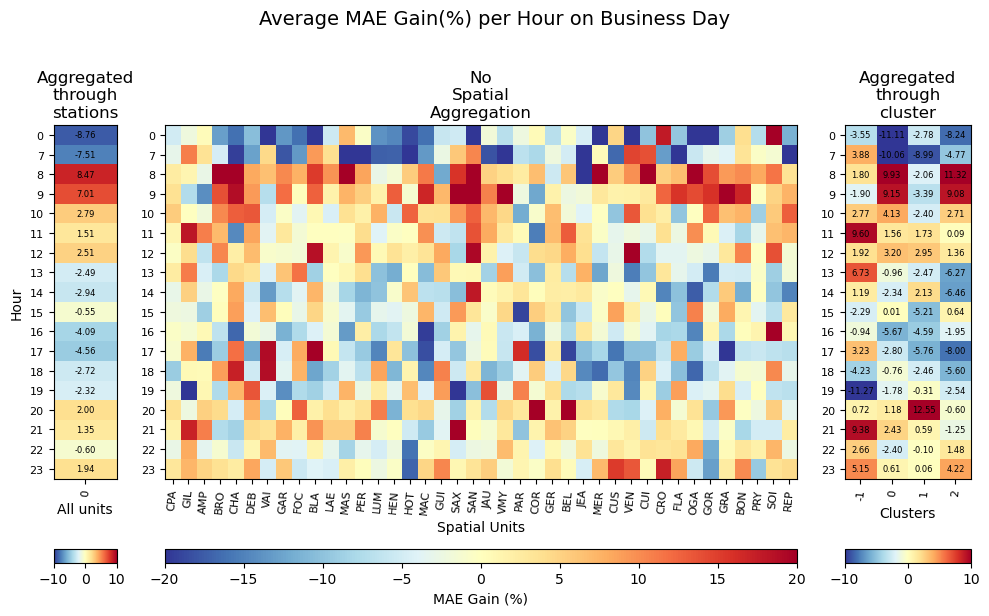

Performance on each trial : 
-----------------------
MAE
   (baseline)  / mean MAE:   [21.47192  20.933304 21.204874 21.8624   21.521952]  //  21.39889
   (config)    / mean MAE:   [21.804255 22.34108  21.220963 21.892422 21.430645]  //  21.737873  // (1.58%)  

RMSE
   (baseline)  / mean RMSE:  [36.23506  35.445946 36.080387 36.686058 36.074673]  //  36.104424
   (config)    / mean RMSE:  [36.805317 37.378994 35.875336 37.20687  36.140255]  //  36.681355  // (1.60%) 

Trial ID 1:  _STAEformer_subway_in_calendar_trial2__e150_h1_bis1_f5
Trial ID 2:  _STAEformer_subway_in_netmob_POIs_calendar_late_fusion_Instagram_Google_Maps_Deezer_CrossAttnBackBone_InEmb24_ctxInEmb24_adp16_adpQ24_aggIris100__e150_h1_bis1_f5
model_save_path for trial id1:  /home/rrochas/prediction-validation/save/K_fold_validation/training_wo_HP_tuning/Exp6_subway_netmob/subway_in_STAEformer/best_models/STAEformer_subway_in_calendar_trial2__e150_h1_bis1_f5.pkl
----------------------------------------
Loading the Complet

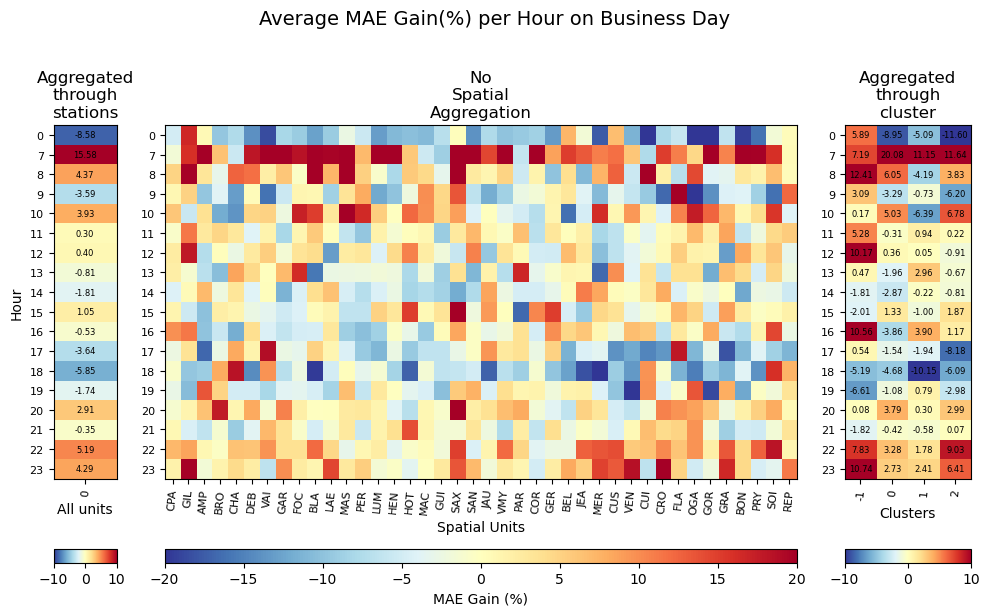

Performance on each trial : 
-----------------------
MAE
   (baseline)  / mean MAE:   [21.47192  20.933304 21.204874 21.8624   21.521952]  //  21.39889
   (config)    / mean MAE:   [21.529192 20.825623 21.193314 21.588797 21.509779]  //  21.329342  // (-0.33%)  

RMSE
   (baseline)  / mean RMSE:  [36.23506  35.445946 36.080387 36.686058 36.074673]  //  36.104424
   (config)    / mean RMSE:  [36.137688 35.233616 35.903004 36.9958   36.298492]  //  36.11372  // (0.03%) 

Trial ID 1:  _STAEformer_subway_in_calendar_trial2__e150_h1_bis1_f5
Trial ID 2:  _STAEformer_subway_in_netmob_POIs_calendar_late_fusion_Instagram_Google_Maps_Deezer_CrossAttnBackBone_InEmb24_ctxInEmb24_adp16_adpQ0_aggIris100__e150_h1_bis1_f5
model_save_path for trial id1:  /home/rrochas/prediction-validation/save/K_fold_validation/training_wo_HP_tuning/Exp6_subway_netmob/subway_in_STAEformer/best_models/STAEformer_subway_in_calendar_trial2__e150_h1_bis1_f5.pkl
----------------------------------------
Loading the Complete

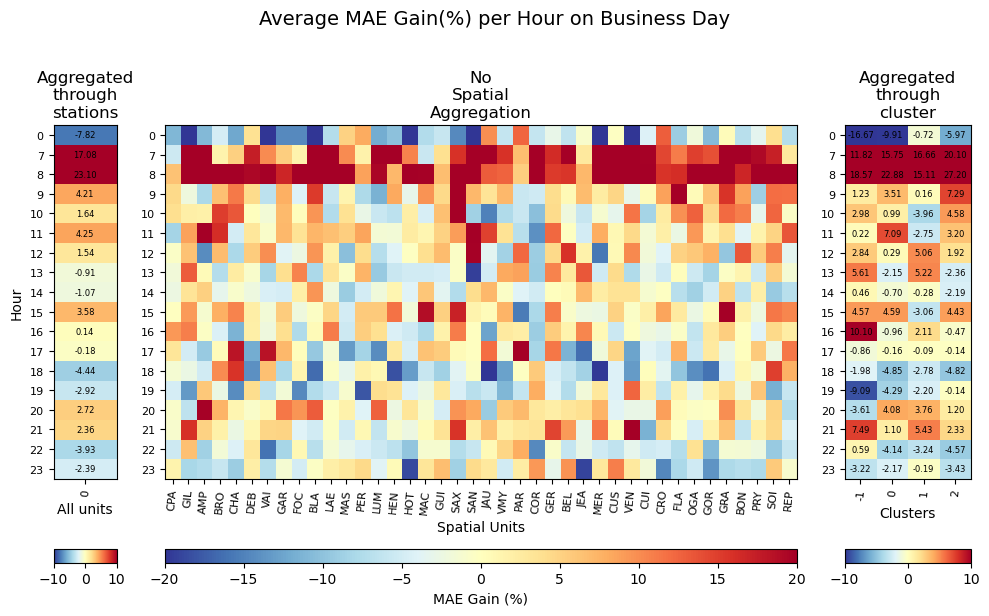

Performance on each trial : 
-----------------------
MAE
   (baseline)  / mean MAE:   [21.47192  20.933304 21.204874 21.8624   21.521952]  //  21.39889
   (config)    / mean MAE:   [22.063513 21.934118 22.007898 21.685518 21.842134]  //  21.906635  // (2.37%)  

RMSE
   (baseline)  / mean RMSE:  [36.23506  35.445946 36.080387 36.686058 36.074673]  //  36.104424
   (config)    / mean RMSE:  [37.86171  36.96992  36.94452  37.018837 37.304817]  //  37.21996  // (3.09%) 

Trial ID 1:  _STAEformer_subway_in_calendar_trial2__e150_h1_bis1_f5
Trial ID 2:  _STAEformer_subway_in_netmob_POIs_calendar_late_fusion_Google_Maps_Deezer_CrossAttnBackBone_InEmb24_ctxInEmb24_adp16_adpQ24_aggIris100__e150_h1_bis1_f5
model_save_path for trial id1:  /home/rrochas/prediction-validation/save/K_fold_validation/training_wo_HP_tuning/Exp6_subway_netmob/subway_in_STAEformer/best_models/STAEformer_subway_in_calendar_trial2__e150_h1_bis1_f5.pkl
----------------------------------------
Loading the Complete Dataset f

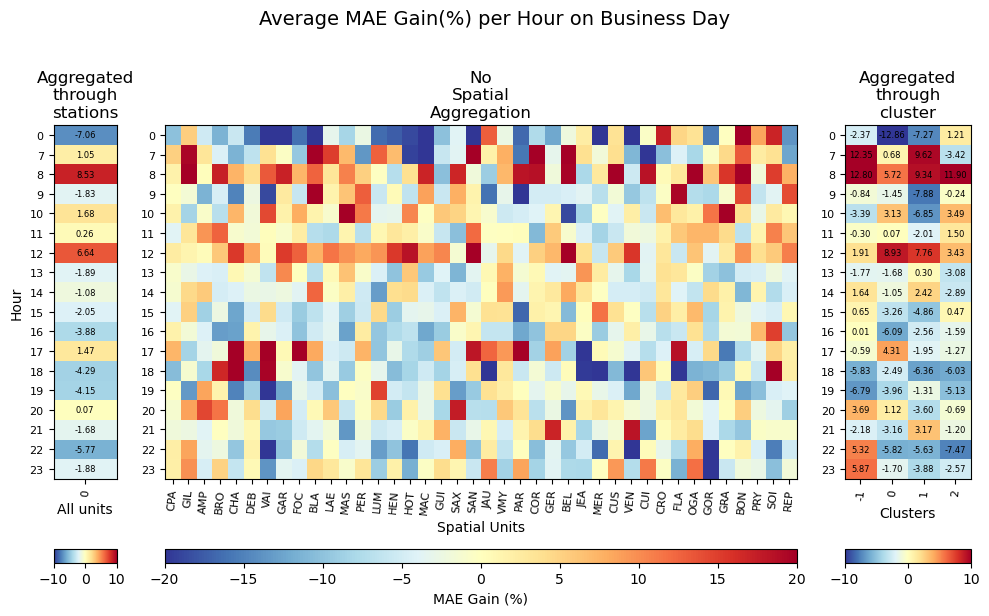

Performance on each trial : 
-----------------------
MAE
   (baseline)  / mean MAE:   [21.47192  20.933304 21.204874 21.8624   21.521952]  //  21.39889
   (config)    / mean MAE:   [21.045559 21.483164 21.560062 20.704617 21.328081]  //  21.224298  // (-0.82%)  

RMSE
   (baseline)  / mean RMSE:  [36.23506  35.445946 36.080387 36.686058 36.074673]  //  36.104424
   (config)    / mean RMSE:  [35.659462 36.044025 36.69557  34.78382  36.17398 ]  //  35.871376  // (-0.65%) 

Trial ID 1:  _STAEformer_subway_in_calendar_trial2__e150_h1_bis1_f5
Trial ID 2:  _STAEformer_subway_in_netmob_POIs_calendar_late_fusion_Google_Maps_Deezer_CrossAttnBackBone_InEmb24_ctxInEmb24_adp16_adpQ0_aggIris100__e150_h1_bis1_f5
model_save_path for trial id1:  /home/rrochas/prediction-validation/save/K_fold_validation/training_wo_HP_tuning/Exp6_subway_netmob/subway_in_STAEformer/best_models/STAEformer_subway_in_calendar_trial2__e150_h1_bis1_f5.pkl
----------------------------------------
Loading the Complete Dataset

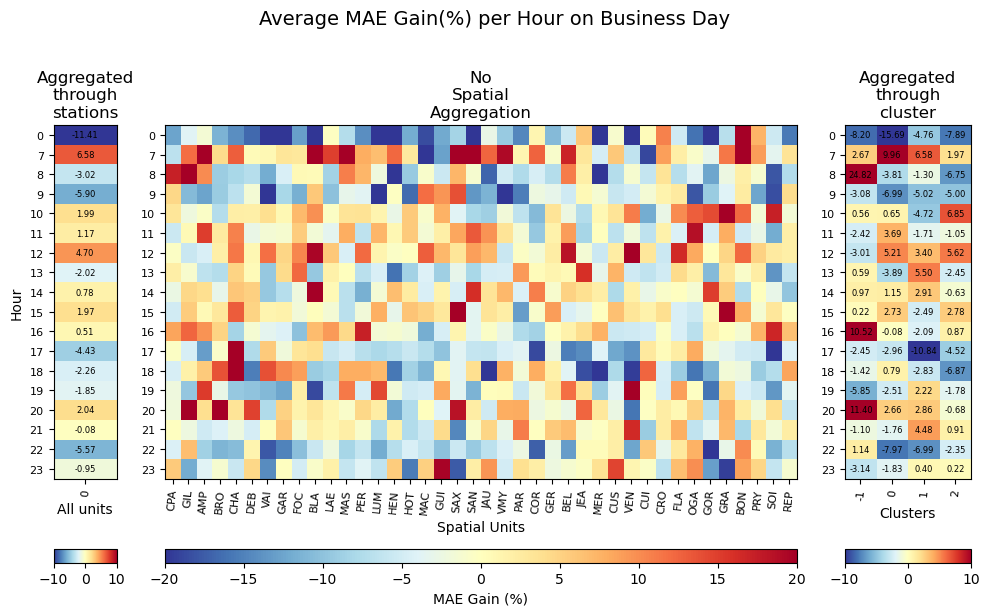

Performance on each trial : 
-----------------------
MAE
   (baseline)  / mean MAE:   [21.47192  20.933304 21.204874 21.8624   21.521952]  //  21.39889
   (config)    / mean MAE:   [21.393627 21.10502  22.273777 21.217623 21.200262]  //  21.43806  // (0.18%)  

RMSE
   (baseline)  / mean RMSE:  [36.23506  35.445946 36.080387 36.686058 36.074673]  //  36.104424
   (config)    / mean RMSE:  [36.108166 35.251095 37.740665 35.574234 35.602787]  //  36.05539  // (-0.14%) 

Trial ID 1:  _STAEformer_subway_in_calendar__e150_h1_bis1_f5
Trial ID 2:  _STAEformer_subway_in_calendar_trial2__e150_h1_bis1_f5
model_save_path for trial id1:  /home/rrochas/prediction-validation/save/K_fold_validation/training_wo_HP_tuning/Exp6_subway_netmob/subway_in_STAEformer/best_models/STAEformer_subway_in_calendar__e150_h1_bis1_f5.pkl
----------------------------------------
Loading the Complete Dataset for K-fold splitting
Coverage Period: 7392 elts between 2019-03-16 00:00:00 and 2019-05-31 23:45:00
Invalid date

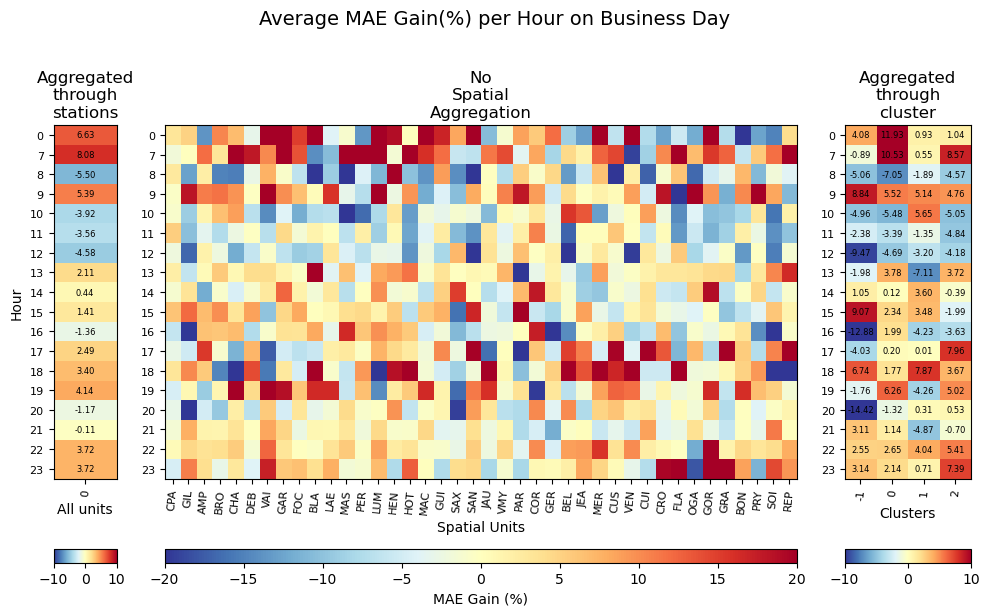

Performance on each trial : 
-----------------------
MAE
   (baseline)  / mean MAE:   [22.757435 21.811853 21.85755  22.109432 21.44222 ]  //  21.995697
   (config)    / mean MAE:   [21.47192  20.933304 21.204874 21.8624   21.521952]  //  21.39889  // (-2.71%)  

RMSE
   (baseline)  / mean RMSE:  [38.17872  37.21041  37.669357 37.235302 36.13153 ]  //  37.285065
   (config)    / mean RMSE:  [36.23506  35.445946 36.080387 36.686058 36.074673]  //  36.104424  // (-3.17%) 

Trial ID 1:  _STAEformer_subway_in_calendar__e150_h1_bis1_f5
Trial ID 2:  _STAEformer_subway_in_netmob_POIs_calendar_late_fusion_Google_Maps_Deezer_CrossAttnBackBone_InEmb24_ctxInEmb24_adp16_adpQ24_aggIris100__e150_h1_bis1_f5
model_save_path for trial id1:  /home/rrochas/prediction-validation/save/K_fold_validation/training_wo_HP_tuning/Exp6_subway_netmob/subway_in_STAEformer/best_models/STAEformer_subway_in_calendar__e150_h1_bis1_f5.pkl
----------------------------------------
Loading the Complete Dataset for K-fold s

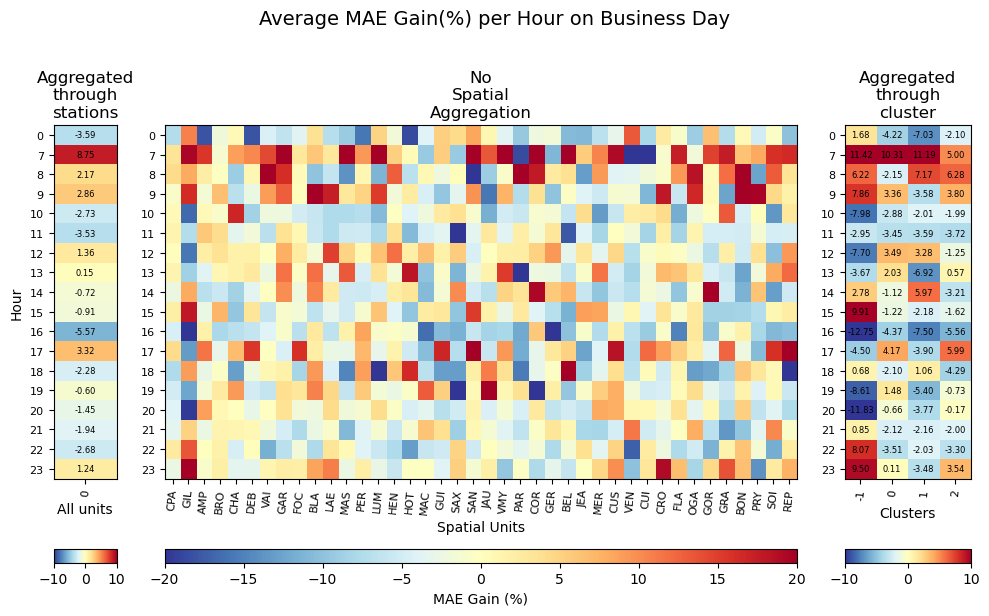

Performance on each trial : 
-----------------------
MAE
   (baseline)  / mean MAE:   [22.757435 21.811853 21.85755  22.109432 21.44222 ]  //  21.995697
   (config)    / mean MAE:   [21.045559 21.483164 21.560062 20.704617 21.328081]  //  21.224298  // (-3.51%)  

RMSE
   (baseline)  / mean RMSE:  [38.17872  37.21041  37.669357 37.235302 36.13153 ]  //  37.285065
   (config)    / mean RMSE:  [35.659462 36.044025 36.69557  34.78382  36.17398 ]  //  35.871376  // (-3.79%) 

Trial ID 1:  _STAEformer_subway_in_calendar__e150_h1_bis1_f5
Trial ID 2:  _STAEformer_subway_in_netmob_POIs_calendar_late_fusion_Google_Maps_Deezer_CrossAttnBackBone_InEmb24_ctxInEmb24_adp16_adpQ0_aggIris100__e150_h1_bis1_f5
model_save_path for trial id1:  /home/rrochas/prediction-validation/save/K_fold_validation/training_wo_HP_tuning/Exp6_subway_netmob/subway_in_STAEformer/best_models/STAEformer_subway_in_calendar__e150_h1_bis1_f5.pkl
----------------------------------------
Loading the Complete Dataset for K-fold s

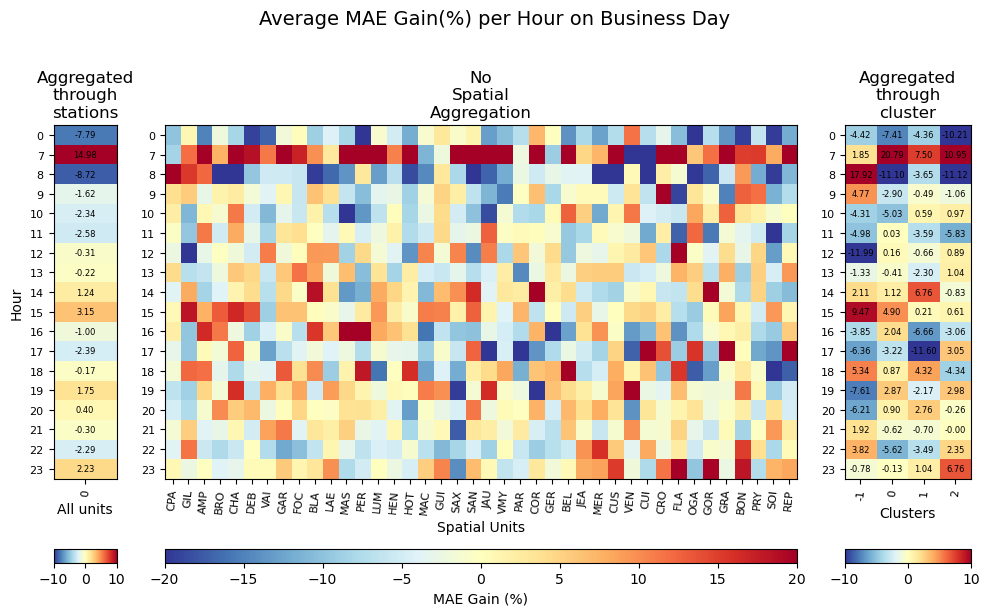

Performance on each trial : 
-----------------------
MAE
   (baseline)  / mean MAE:   [22.757435 21.811853 21.85755  22.109432 21.44222 ]  //  21.995697
   (config)    / mean MAE:   [21.393627 21.10502  22.273777 21.217623 21.200262]  //  21.43806  // (-2.54%)  

RMSE
   (baseline)  / mean RMSE:  [38.17872  37.21041  37.669357 37.235302 36.13153 ]  //  37.285065
   (config)    / mean RMSE:  [36.108166 35.251095 37.740665 35.574234 35.602787]  //  36.05539  // (-3.30%) 

Trial ID 1:  _STAEformer_subway_in_calendar__e150_h1_bis1_f5
Trial ID 2:  _STAEformer_subway_in_netmob_POIs_calendar_late_fusion_Instagram_Deezer_CrossAttnBackBone_InEmb24_ctxInEmb24_adp16_adpQ24_aggIris100__e150_h1_bis1_f5
model_save_path for trial id1:  /home/rrochas/prediction-validation/save/K_fold_validation/training_wo_HP_tuning/Exp6_subway_netmob/subway_in_STAEformer/best_models/STAEformer_subway_in_calendar__e150_h1_bis1_f5.pkl
----------------------------------------
Loading the Complete Dataset for K-fold spli

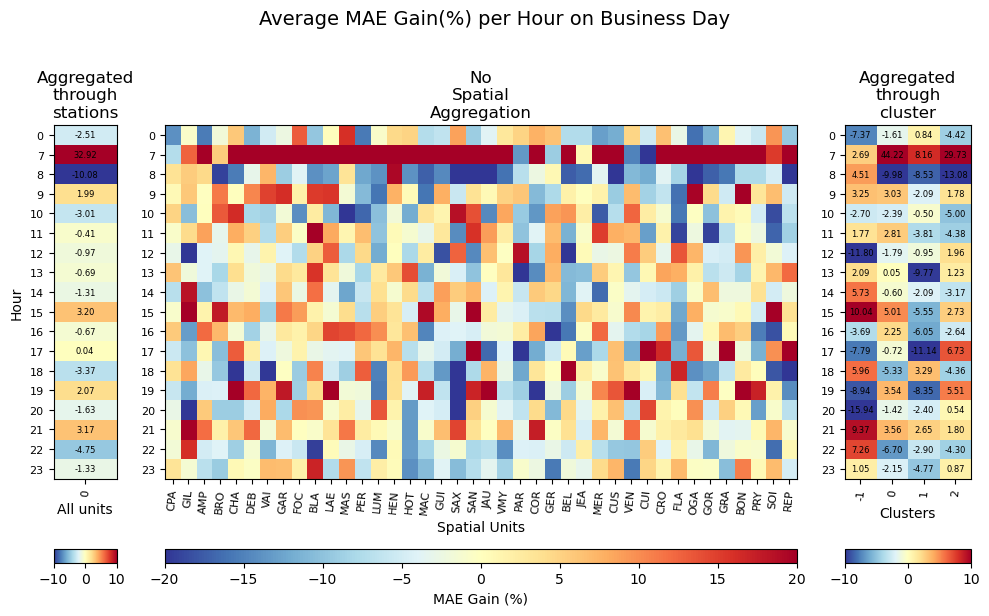

Performance on each trial : 
-----------------------
MAE
   (baseline)  / mean MAE:   [22.757435 21.811853 21.85755  22.109432 21.44222 ]  //  21.995697
   (config)    / mean MAE:   [22.501373 21.168745 21.025856 21.086473 21.348616]  //  21.426212  // (-2.59%)  

RMSE
   (baseline)  / mean RMSE:  [38.17872  37.21041  37.669357 37.235302 36.13153 ]  //  37.285065
   (config)    / mean RMSE:  [37.911545 35.749702 35.73744  35.44239  35.74627 ]  //  36.11747  // (-3.13%) 

Trial ID 1:  _STAEformer_subway_in_calendar__e150_h1_bis1_f5
Trial ID 2:  _STAEformer_subway_in_netmob_POIs_calendar_late_fusion_Instagram_Deezer_CrossAttnBackBone_InEmb24_ctxInEmb24_adp16_adpQ0_aggIris100__e150_h1_bis1_f5
model_save_path for trial id1:  /home/rrochas/prediction-validation/save/K_fold_validation/training_wo_HP_tuning/Exp6_subway_netmob/subway_in_STAEformer/best_models/STAEformer_subway_in_calendar__e150_h1_bis1_f5.pkl
----------------------------------------
Loading the Complete Dataset for K-fold spli

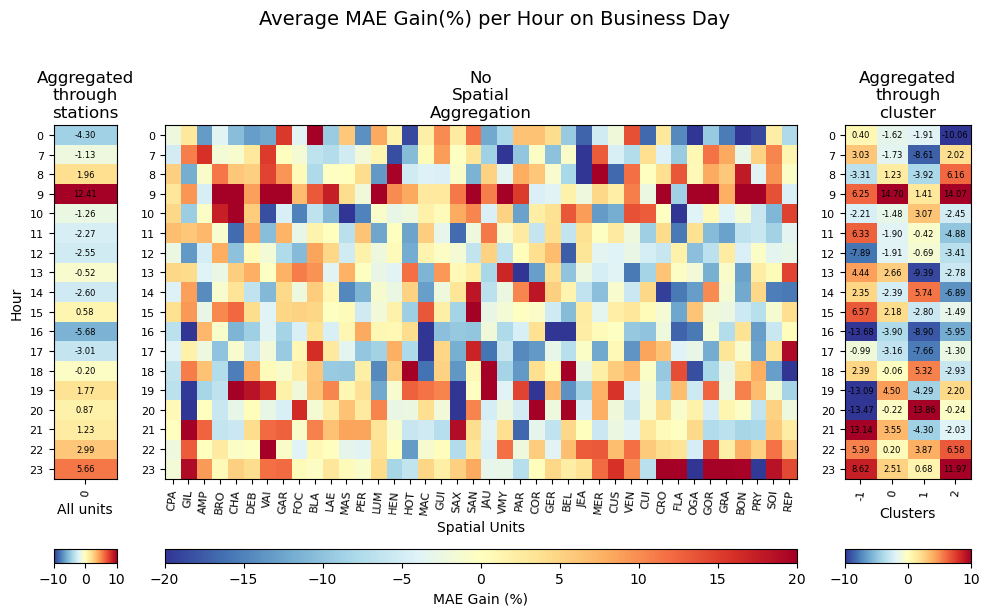

Performance on each trial : 
-----------------------
MAE
   (baseline)  / mean MAE:   [22.757435 21.811853 21.85755  22.109432 21.44222 ]  //  21.995697
   (config)    / mean MAE:   [21.804255 22.34108  21.220963 21.892422 21.430645]  //  21.737873  // (-1.17%)  

RMSE
   (baseline)  / mean RMSE:  [38.17872  37.21041  37.669357 37.235302 36.13153 ]  //  37.285065
   (config)    / mean RMSE:  [36.805317 37.378994 35.875336 37.20687  36.140255]  //  36.681355  // (-1.62%) 

Trial ID 1:  _STAEformer_subway_in_calendar__e150_h1_bis1_f5
Trial ID 2:  _STAEformer_subway_in_netmob_POIs_calendar_late_fusion_Instagram_Google_Maps_Deezer_CrossAttnBackBone_InEmb24_ctxInEmb24_adp16_adpQ24_aggIris100__e150_h1_bis1_f5
model_save_path for trial id1:  /home/rrochas/prediction-validation/save/K_fold_validation/training_wo_HP_tuning/Exp6_subway_netmob/subway_in_STAEformer/best_models/STAEformer_subway_in_calendar__e150_h1_bis1_f5.pkl
----------------------------------------
Loading the Complete Dataset f

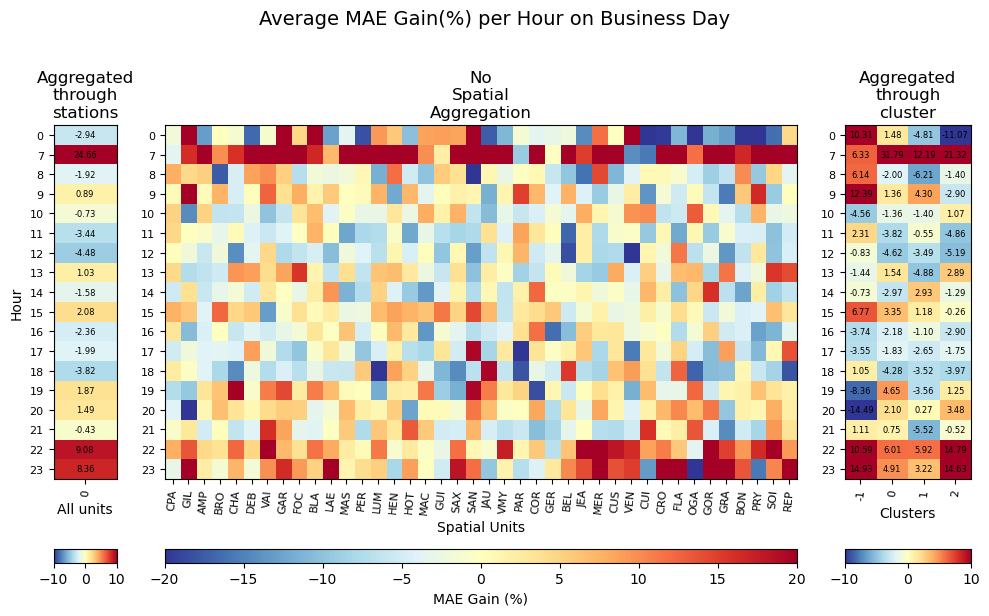

Performance on each trial : 
-----------------------
MAE
   (baseline)  / mean MAE:   [22.757435 21.811853 21.85755  22.109432 21.44222 ]  //  21.995697
   (config)    / mean MAE:   [21.529192 20.825623 21.193314 21.588797 21.509779]  //  21.329342  // (-3.03%)  

RMSE
   (baseline)  / mean RMSE:  [38.17872  37.21041  37.669357 37.235302 36.13153 ]  //  37.285065
   (config)    / mean RMSE:  [36.137688 35.233616 35.903004 36.9958   36.298492]  //  36.11372  // (-3.14%) 

Trial ID 1:  _STAEformer_subway_in_calendar__e150_h1_bis1_f5
Trial ID 2:  _STAEformer_subway_in_netmob_POIs_calendar_late_fusion_Instagram_Google_Maps_Deezer_CrossAttnBackBone_InEmb24_ctxInEmb24_adp16_adpQ0_aggIris100__e150_h1_bis1_f5
model_save_path for trial id1:  /home/rrochas/prediction-validation/save/K_fold_validation/training_wo_HP_tuning/Exp6_subway_netmob/subway_in_STAEformer/best_models/STAEformer_subway_in_calendar__e150_h1_bis1_f5.pkl
----------------------------------------
Loading the Complete Dataset for

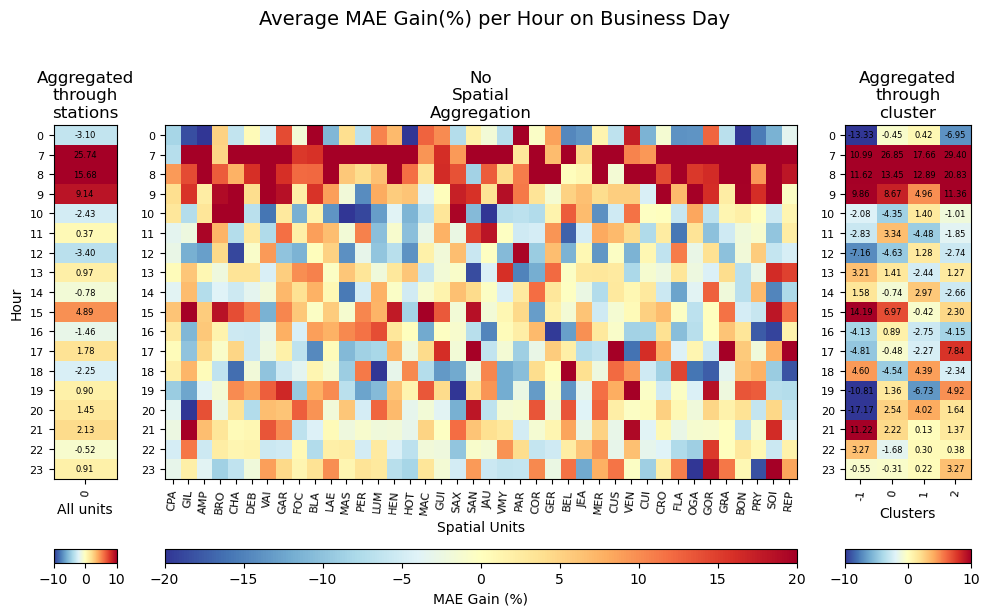

Performance on each trial : 
-----------------------
MAE
   (baseline)  / mean MAE:   [22.757435 21.811853 21.85755  22.109432 21.44222 ]  //  21.995697
   (config)    / mean MAE:   [22.063513 21.934118 22.007898 21.685518 21.842134]  //  21.906635  // (-0.40%)  

RMSE
   (baseline)  / mean RMSE:  [38.17872  37.21041  37.669357 37.235302 36.13153 ]  //  37.285065
   (config)    / mean RMSE:  [37.86171  36.96992  36.94452  37.018837 37.304817]  //  37.21996  // (-0.17%) 

Trial ID 1:  _STAEformer_subway_in_calendar__e150_h1_bis1_f5
Trial ID 2:  _STAEformer_subway_in_netmob_POIs_calendar_late_fusion_Google_Maps_Deezer_CrossAttnBackBone_InEmb24_ctxInEmb24_adp16_adpQ24_aggIris100__e150_h1_bis1_f5
model_save_path for trial id1:  /home/rrochas/prediction-validation/save/K_fold_validation/training_wo_HP_tuning/Exp6_subway_netmob/subway_in_STAEformer/best_models/STAEformer_subway_in_calendar__e150_h1_bis1_f5.pkl
----------------------------------------
Loading the Complete Dataset for K-fold s

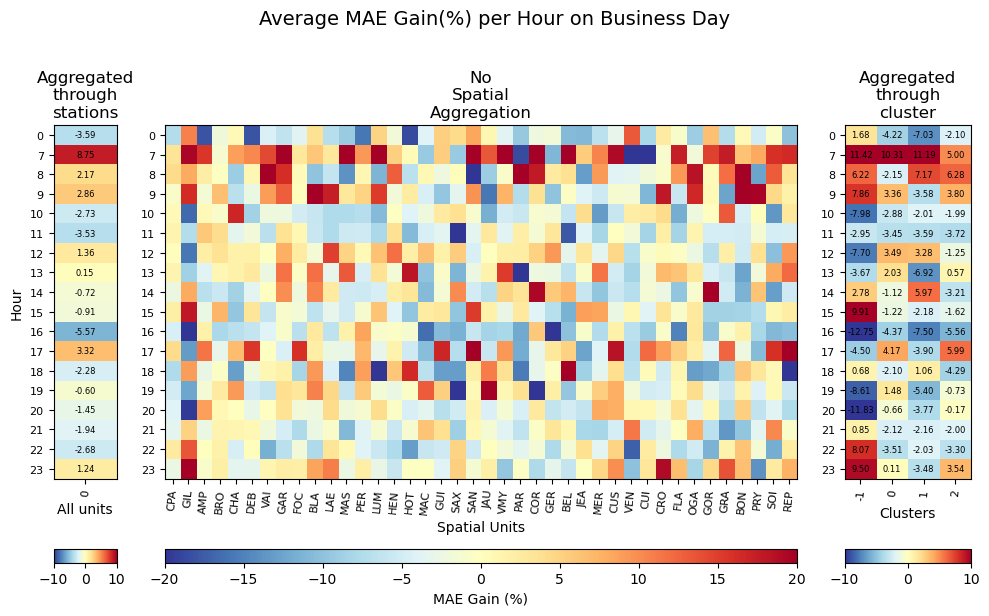

Performance on each trial : 
-----------------------
MAE
   (baseline)  / mean MAE:   [22.757435 21.811853 21.85755  22.109432 21.44222 ]  //  21.995697
   (config)    / mean MAE:   [21.045559 21.483164 21.560062 20.704617 21.328081]  //  21.224298  // (-3.51%)  

RMSE
   (baseline)  / mean RMSE:  [38.17872  37.21041  37.669357 37.235302 36.13153 ]  //  37.285065
   (config)    / mean RMSE:  [35.659462 36.044025 36.69557  34.78382  36.17398 ]  //  35.871376  // (-3.79%) 

Trial ID 1:  _STAEformer_subway_in_calendar__e150_h1_bis1_f5
Trial ID 2:  _STAEformer_subway_in_netmob_POIs_calendar_late_fusion_Google_Maps_Deezer_CrossAttnBackBone_InEmb24_ctxInEmb24_adp16_adpQ0_aggIris100__e150_h1_bis1_f5
model_save_path for trial id1:  /home/rrochas/prediction-validation/save/K_fold_validation/training_wo_HP_tuning/Exp6_subway_netmob/subway_in_STAEformer/best_models/STAEformer_subway_in_calendar__e150_h1_bis1_f5.pkl
----------------------------------------
Loading the Complete Dataset for K-fold s

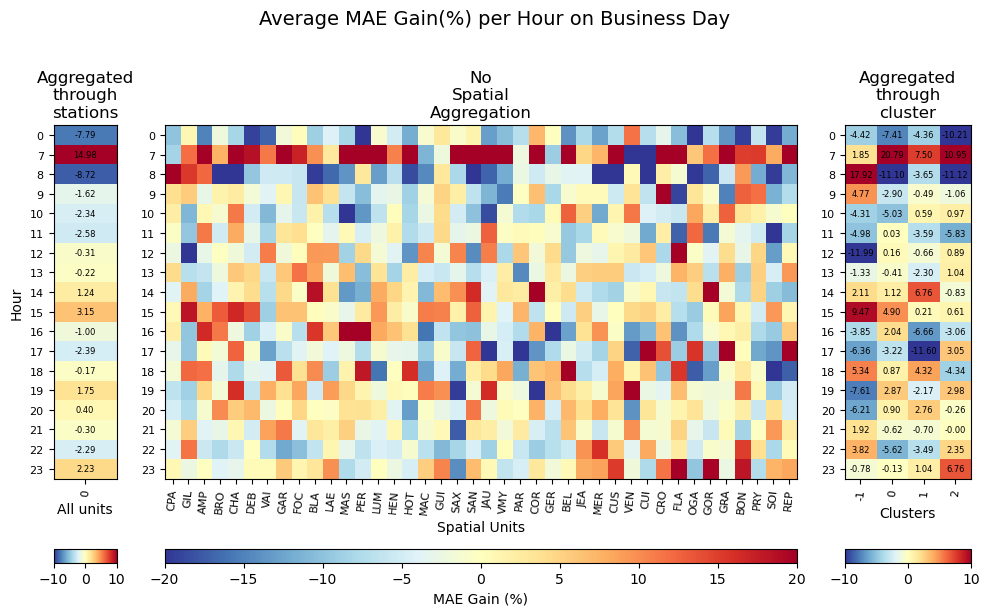

Performance on each trial : 
-----------------------
MAE
   (baseline)  / mean MAE:   [22.757435 21.811853 21.85755  22.109432 21.44222 ]  //  21.995697
   (config)    / mean MAE:   [21.393627 21.10502  22.273777 21.217623 21.200262]  //  21.43806  // (-2.54%)  

RMSE
   (baseline)  / mean RMSE:  [38.17872  37.21041  37.669357 37.235302 36.13153 ]  //  37.285065
   (config)    / mean RMSE:  [36.108166 35.251095 37.740665 35.574234 35.602787]  //  36.05539  // (-3.30%) 



In [3]:
from examples.accuracy_comparison import get_rainy_indices,get_model_args,get_desagregated_comparison_plot

folder = 'Exp6_subway_netmob' # 'Exp4' # 'Exp4_15min'
target_data = 'subway_in'
model_name = 'STAEformer'
h = 1 # 4 # 1
station_clustering = True
range_k = range(1,6)

trial_ids1 = [ 
            # ----------------------------
            f'STAEformer_subway_in_calendar_trial2__e150_h{h}_bis',  # Témoin 
            
              f'STAEformer_subway_in_calendar_trial2__e150_h{h}_bis', 
              f'STAEformer_subway_in_calendar_trial2__e150_h{h}_bis', 

              f'STAEformer_subway_in_calendar_trial2__e150_h{h}_bis', 
              f'STAEformer_subway_in_calendar_trial2__e150_h{h}_bis', 

              f'STAEformer_subway_in_calendar_trial2__e150_h{h}_bis',  # Témoin 
              f'STAEformer_subway_in_calendar_trial2__e150_h{h}_bis', 

              f'STAEformer_subway_in_calendar_trial2__e150_h{h}_bis', 
              f'STAEformer_subway_in_calendar_trial2__e150_h{h}_bis', 
            # ----------------------------

            # ----------------------------
            f'STAEformer_subway_in_calendar__e150_h{h}_bis',  # Témoin 
            
              f'STAEformer_subway_in_calendar__e150_h{h}_bis', 
              f'STAEformer_subway_in_calendar__e150_h{h}_bis', 

              f'STAEformer_subway_in_calendar__e150_h{h}_bis', 
              f'STAEformer_subway_in_calendar__e150_h{h}_bis', 

              f'STAEformer_subway_in_calendar__e150_h{h}_bis',  # Témoin 
              f'STAEformer_subway_in_calendar__e150_h{h}_bis', 

              f'STAEformer_subway_in_calendar__e150_h{h}_bis', 
              f'STAEformer_subway_in_calendar__e150_h{h}_bis', 
            # ----------------------------
                # f'STAEformer_subway_in_calendar__e150_h{h}_bis',
                # f'STAEformer_subway_in_calendar__e150_h{h}_bis',
                # f'STAEformer_subway_in_calendar__e150_h{h}_bis',
                # f'STAEformer_subway_in_calendar__e150_h{h}_bis',
                # f'STAEformer_subway_in_calendar__e150_h{h}_bis',
                # f'STAEformer_subway_in_calendar__e150_h{h}_bis',
                # f'STAEformer_subway_in_calendar__e150_h{h}_bis',
                # f'STAEformer_subway_in_calendar__e150_h{h}_bis',
                ]

trial_ids2 = [
              # f'STAEformer_subway_in_calendar_trial2__e150_h{h}_bis',  # Témoin 

            #   f'STAEformer_subway_in_netmob_POIs_calendar_late_fusion_CrossAttnBackBone_InEmb24_ctxInEmb8_adp16_adpQ24_aggIris100__e150_h{h}_bis',   # Best NetMob 
            #   f'STAEformer_subway_in_netmob_POIs_calendar_late_fusion_Instagram_Deezer_CrossAttnBackBone_InEmb24_ctxInEmb24_adp16_adpQ24_aggIris100_trial2__e150_h{h}_bis',
            #   f'STAEformer_subway_in_netmob_POIs_calendar_late_fusion_Google_Maps_Deezer_CrossAttnBackBone_InEmb24_ctxInEmb24_adp16_adpQ24_aggIris100_trial2__e150_h{h}_bis',

            # ----------------------------
              f'STAEformer_subway_in_calendar__e150_h{h}_bis', 

              f'STAEformer_subway_in_netmob_POIs_calendar_late_fusion_Google_Maps_Deezer_CrossAttnBackBone_InEmb24_ctxInEmb24_adp16_adpQ24_aggIris100__e150_h{h}_bis',
              f'STAEformer_subway_in_netmob_POIs_calendar_late_fusion_Google_Maps_Deezer_CrossAttnBackBone_InEmb24_ctxInEmb24_adp16_adpQ0_aggIris100__e150_h{h}_bis',

              f'STAEformer_subway_in_netmob_POIs_calendar_late_fusion_Instagram_Deezer_CrossAttnBackBone_InEmb24_ctxInEmb24_adp16_adpQ24_aggIris100__e150_h{h}_bis',
              f'STAEformer_subway_in_netmob_POIs_calendar_late_fusion_Instagram_Deezer_CrossAttnBackBone_InEmb24_ctxInEmb24_adp16_adpQ0_aggIris100__e150_h{h}_bis',

              f'STAEformer_subway_in_netmob_POIs_calendar_late_fusion_Instagram_Google_Maps_Deezer_CrossAttnBackBone_InEmb24_ctxInEmb24_adp16_adpQ24_aggIris100__e150_h{h}_bis',
              f'STAEformer_subway_in_netmob_POIs_calendar_late_fusion_Instagram_Google_Maps_Deezer_CrossAttnBackBone_InEmb24_ctxInEmb24_adp16_adpQ0_aggIris100__e150_h{h}_bis',

              f'STAEformer_subway_in_netmob_POIs_calendar_late_fusion_Google_Maps_Deezer_CrossAttnBackBone_InEmb24_ctxInEmb24_adp16_adpQ24_aggIris100__e150_h{h}_bis',
              f'STAEformer_subway_in_netmob_POIs_calendar_late_fusion_Google_Maps_Deezer_CrossAttnBackBone_InEmb24_ctxInEmb24_adp16_adpQ0_aggIris100__e150_h{h}_bis',
              # ----------------------------


            # ----------------------------
              f'STAEformer_subway_in_calendar_trial2__e150_h{h}_bis', 

              f'STAEformer_subway_in_netmob_POIs_calendar_late_fusion_Google_Maps_Deezer_CrossAttnBackBone_InEmb24_ctxInEmb24_adp16_adpQ24_aggIris100__e150_h{h}_bis',
              f'STAEformer_subway_in_netmob_POIs_calendar_late_fusion_Google_Maps_Deezer_CrossAttnBackBone_InEmb24_ctxInEmb24_adp16_adpQ0_aggIris100__e150_h{h}_bis',

              f'STAEformer_subway_in_netmob_POIs_calendar_late_fusion_Instagram_Deezer_CrossAttnBackBone_InEmb24_ctxInEmb24_adp16_adpQ24_aggIris100__e150_h{h}_bis',
              f'STAEformer_subway_in_netmob_POIs_calendar_late_fusion_Instagram_Deezer_CrossAttnBackBone_InEmb24_ctxInEmb24_adp16_adpQ0_aggIris100__e150_h{h}_bis',

              f'STAEformer_subway_in_netmob_POIs_calendar_late_fusion_Instagram_Google_Maps_Deezer_CrossAttnBackBone_InEmb24_ctxInEmb24_adp16_adpQ24_aggIris100__e150_h{h}_bis',
              f'STAEformer_subway_in_netmob_POIs_calendar_late_fusion_Instagram_Google_Maps_Deezer_CrossAttnBackBone_InEmb24_ctxInEmb24_adp16_adpQ0_aggIris100__e150_h{h}_bis',

              f'STAEformer_subway_in_netmob_POIs_calendar_late_fusion_Google_Maps_Deezer_CrossAttnBackBone_InEmb24_ctxInEmb24_adp16_adpQ24_aggIris100__e150_h{h}_bis',
              f'STAEformer_subway_in_netmob_POIs_calendar_late_fusion_Google_Maps_Deezer_CrossAttnBackBone_InEmb24_ctxInEmb24_adp16_adpQ0_aggIris100__e150_h{h}_bis',
               # ----------------------------





              # f'STAEformer_subway_in_netmob_POIs_calendar_late_fusion_Google_Maps_Web_Weather_CrossAttnBackBone_InEmb24_ctxInEmb8_adp16_adpQ24_aggIris100_trial2__e150_h{h}_bis',
              # f'STAEformer_subway_in_netmob_POIs_calendar_late_fusion_Google_Maps_Web_Weather_CrossAttnBackBone_InEmb24_ctxInEmb24_adp16_adpQ24_aggIris100_trial2__e150_h{h}_bis',

                # f'STAEformer_subway_in_netmob_POIs_calendar_late_fusion_CrossAttnBackBone_InEmb24_ctxInEmb24_adp16_adpQ24_aggIris100__e150_h{h}_bis',
                # f'STAEformer_subway_in_netmob_POIs_calendar_late_fusion_CrossAttnBackBone_InEmb24_ctxInEmb48_adp16_adpQ24_aggIris100__e150_h{h}_bis',
                # f'STAEformer_subway_in_netmob_POIs_calendar_late_fusion_CrossAttnBackBone_InEmb24_ctxInEmb24_adp16_adpQ24__e150_h{h}_bis',
            ]
    

trial_id1_in_bis = False
trial_id2_in_bis = False

 
save_folder_name = f'{folder}/{target_data}_{model_name}' 
save_folder_name_bis = f'{folder}/{target_data}_{model_name}'


for trial_id1,trial_id2 in zip(trial_ids1,trial_ids2):
    model_args,model_args_bis,path_model_args,path_model_args_bis = get_model_args(save_folder_name,save_folder_name_bis)
    
    clusterer,full_predict1,full_predict2,train_input,X,Y_true,L_trainer1,L_trainer2,ds1,ds2,args_init1,args_init2,rainy_indices,mask = get_desagregated_comparison_plot(trial_id1,trial_id2,
                                                                                        model_args = model_args,
                                                                                        model_args_bis = model_args_bis,
                                                                                        path_model_args = path_model_args,
                                                                                        path_model_args_bis = path_model_args_bis,
                                                                                        range_k = range_k,
                                                                                        trial_id1_in_bis=False,
                                                                                        trial_id2_in_bis=False,
                                                                                        comparison_on_rainy_events = False,
                                                                                        station_clustering = station_clustering,
                                                                                        folder_path = None,
                                                                                        save_name = None,
                                                                                        heatmap = False,
                                                                                        daily_profile = False,
                                                                                        dendrogram = False
                                                                                        )
    

    # Compute MAE: 
    MAE_each_trial_1 = abs(Y_true.unsqueeze(-1).repeat(1,1,1,5)-full_predict1).mean([0,1,2])
    MAE_each_trial_2 = abs(Y_true.unsqueeze(-1).repeat(1,1,1,5)-full_predict2).mean([0,1,2])
    print('Performance on each trial : \n-----------------------')
    print('MAE')
    print('   (baseline)  / mean MAE:  ', MAE_each_trial_1.cpu().numpy(), ' // ', MAE_each_trial_1.mean().cpu().numpy())
    print('   (config)    / mean MAE:  ', MAE_each_trial_2.cpu().numpy(), ' // ', MAE_each_trial_2.mean().cpu().numpy(), 
          f' // ({"{:.2f}".format(100*(MAE_each_trial_2.mean().cpu().numpy()/MAE_each_trial_1.mean().cpu().numpy()-1))}%) ','\n'
          )

    # Compute RMSE:
    RMSE_each_trial_1 = torch.sqrt(((Y_true.unsqueeze(-1).repeat(1,1,1,5)-full_predict1)**2).mean([0,1,2]))
    RMSE_each_trial_2 = torch.sqrt(((Y_true.unsqueeze(-1).repeat(1,1,1,5)-full_predict2)**2).mean([0,1,2]))

    print('RMSE')
    print('   (baseline)  / mean RMSE: ', RMSE_each_trial_1.cpu().numpy(), ' // ', RMSE_each_trial_1.mean().cpu().numpy())
    print('   (config)    / mean RMSE: ', RMSE_each_trial_2.cpu().numpy(), ' // ', RMSE_each_trial_2.mean().cpu().numpy(),
          f' // ({"{:.2f}".format(100*(RMSE_each_trial_2.mean().cpu().numpy()/RMSE_each_trial_1.mean().cpu().numpy()-1))}%)','\n'
          )



# Analysing Attention Weights

In [ ]:
print(attn_score.size(),attn_score.std(1).mean())

(torch.Size([3760, 7, 40, 40]), tensor(0.0028))

torch.Size([3760, 40, 7, 7]) Std on dim 1:  0.08325637131929398 Min/Max:  0.014902163296937943 0.4391227662563324
torch.Size([3760, 40, 7, 7]) Std on dim 1:  0.06721911579370499 Min/Max:  0.08320614695549011 0.23760920763015747
torch.Size([3760, 40, 7, 7]) Std on dim 1:  0.07434918731451035 Min/Max:  0.08076806366443634 0.26796838641166687
torch.Size([3760, 7, 40, 40]) Std on dim 1:  0.00840148888528347 Min/Max:  0.00996241346001625 0.08047600835561752
torch.Size([3760, 7, 40, 40]) Std on dim 1:  0.005315958056598902 Min/Max:  0.019288361072540283 0.04736649990081787
torch.Size([3760, 7, 40, 40]) Std on dim 1:  0.0027617805171757936 Min/Max:  0.017477814108133316 0.0373830683529377


<Figure size 2000x1000 with 0 Axes>

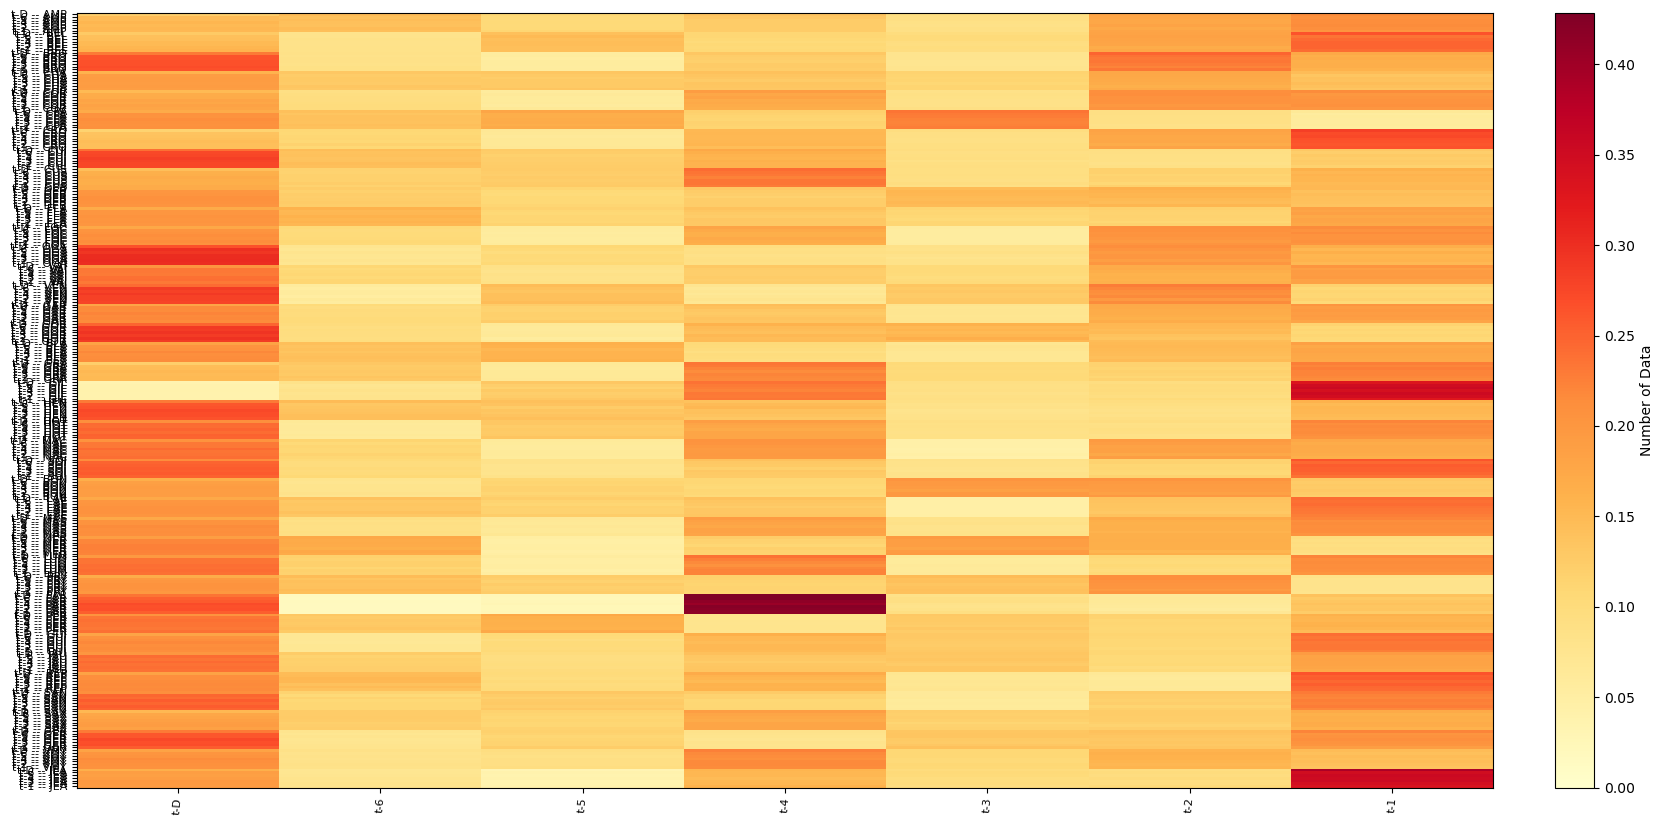

<Figure size 2000x1000 with 0 Axes>

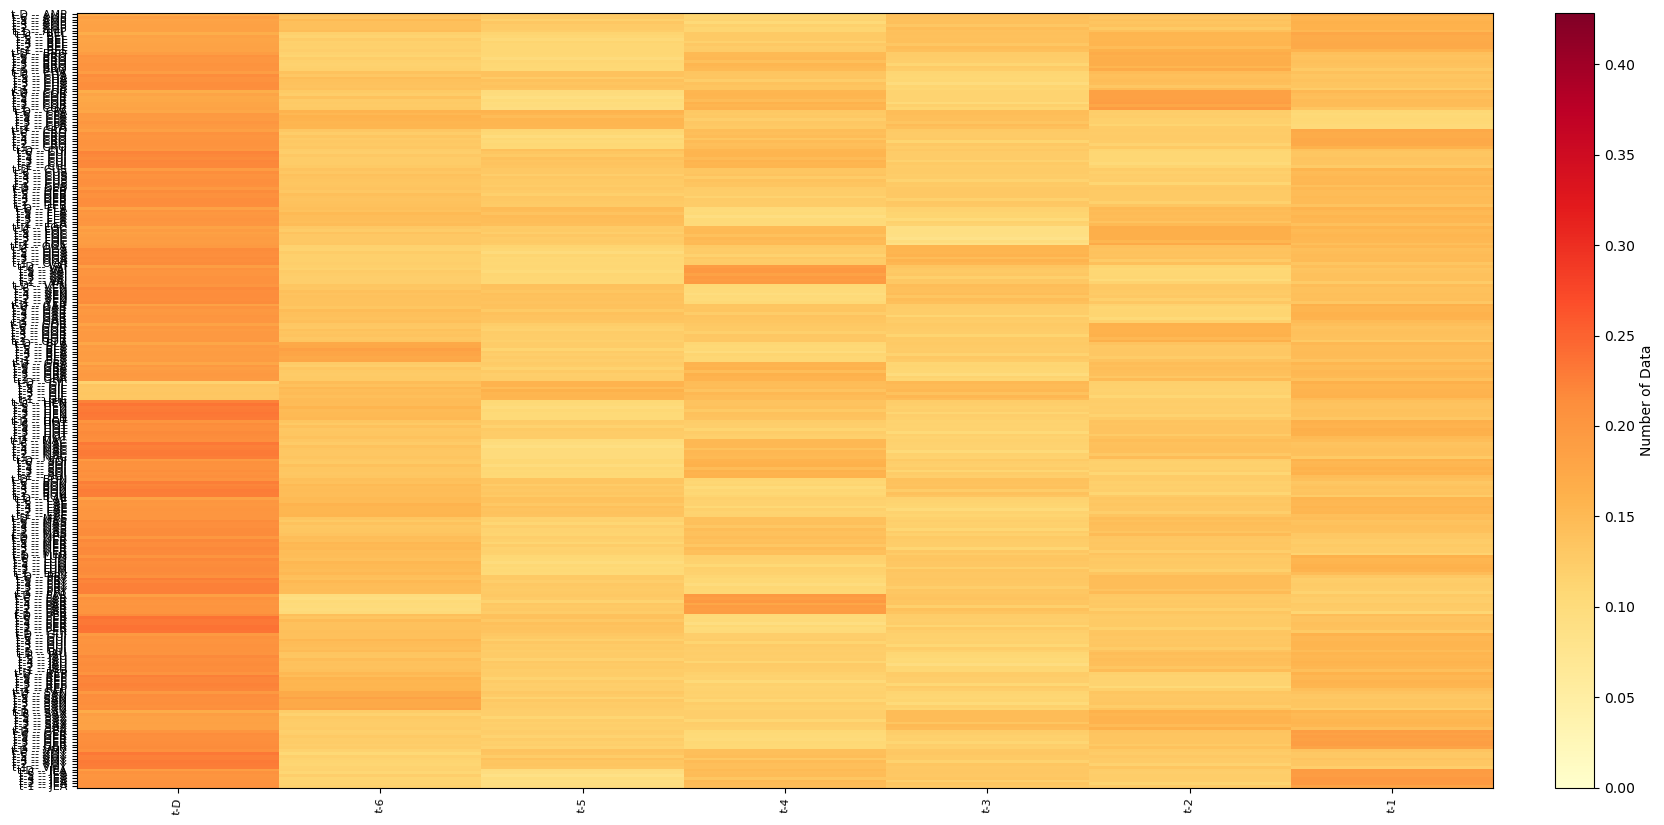

<Figure size 2000x1000 with 0 Axes>

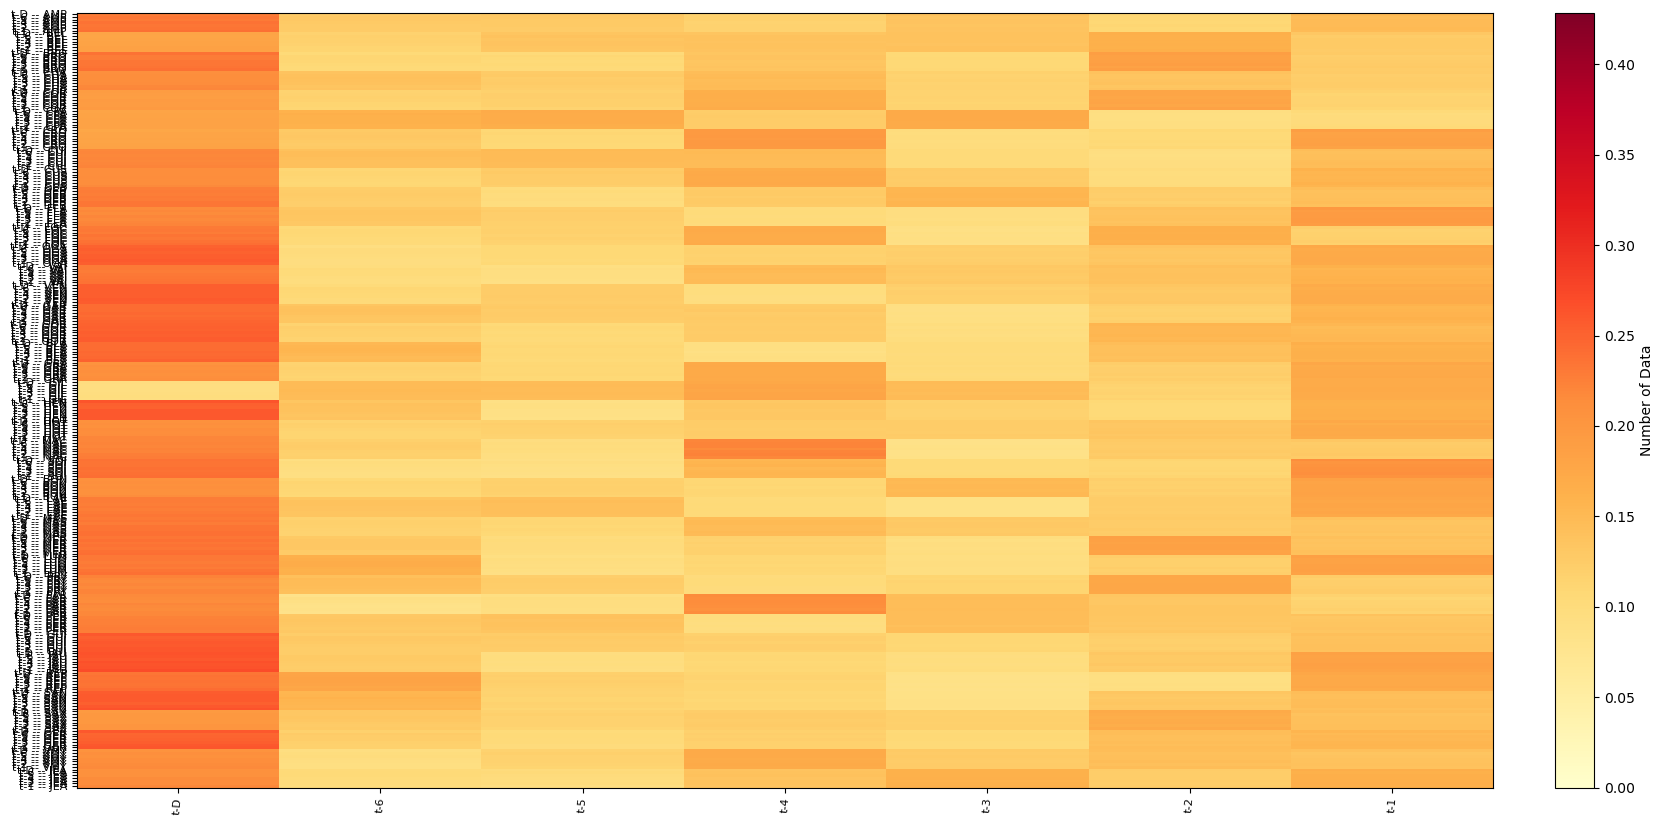

<Figure size 2000x1000 with 0 Axes>

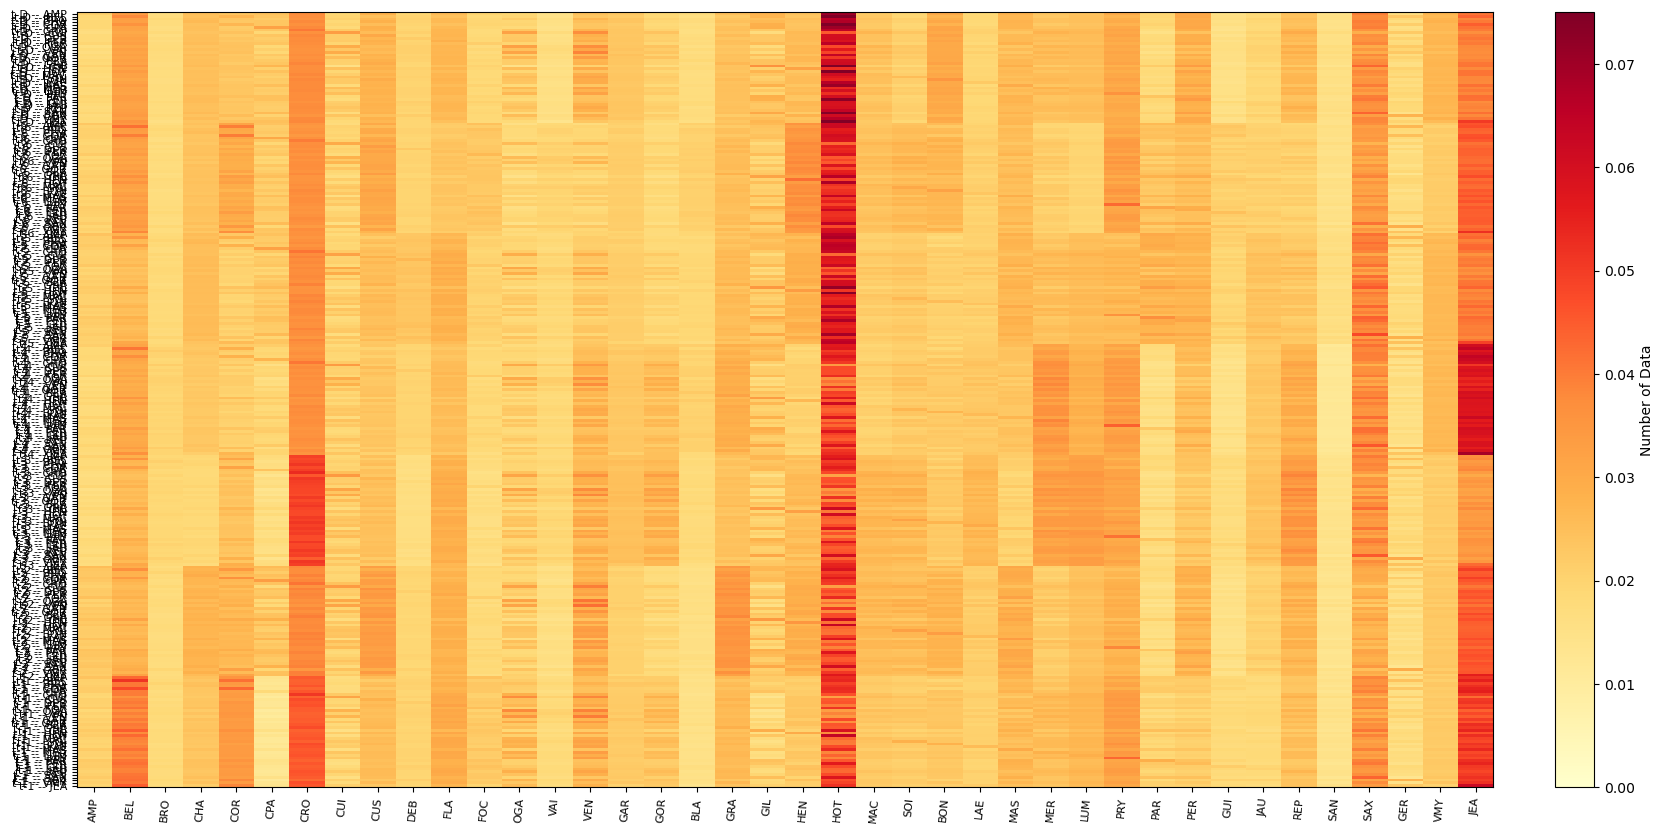

<Figure size 2000x1000 with 0 Axes>

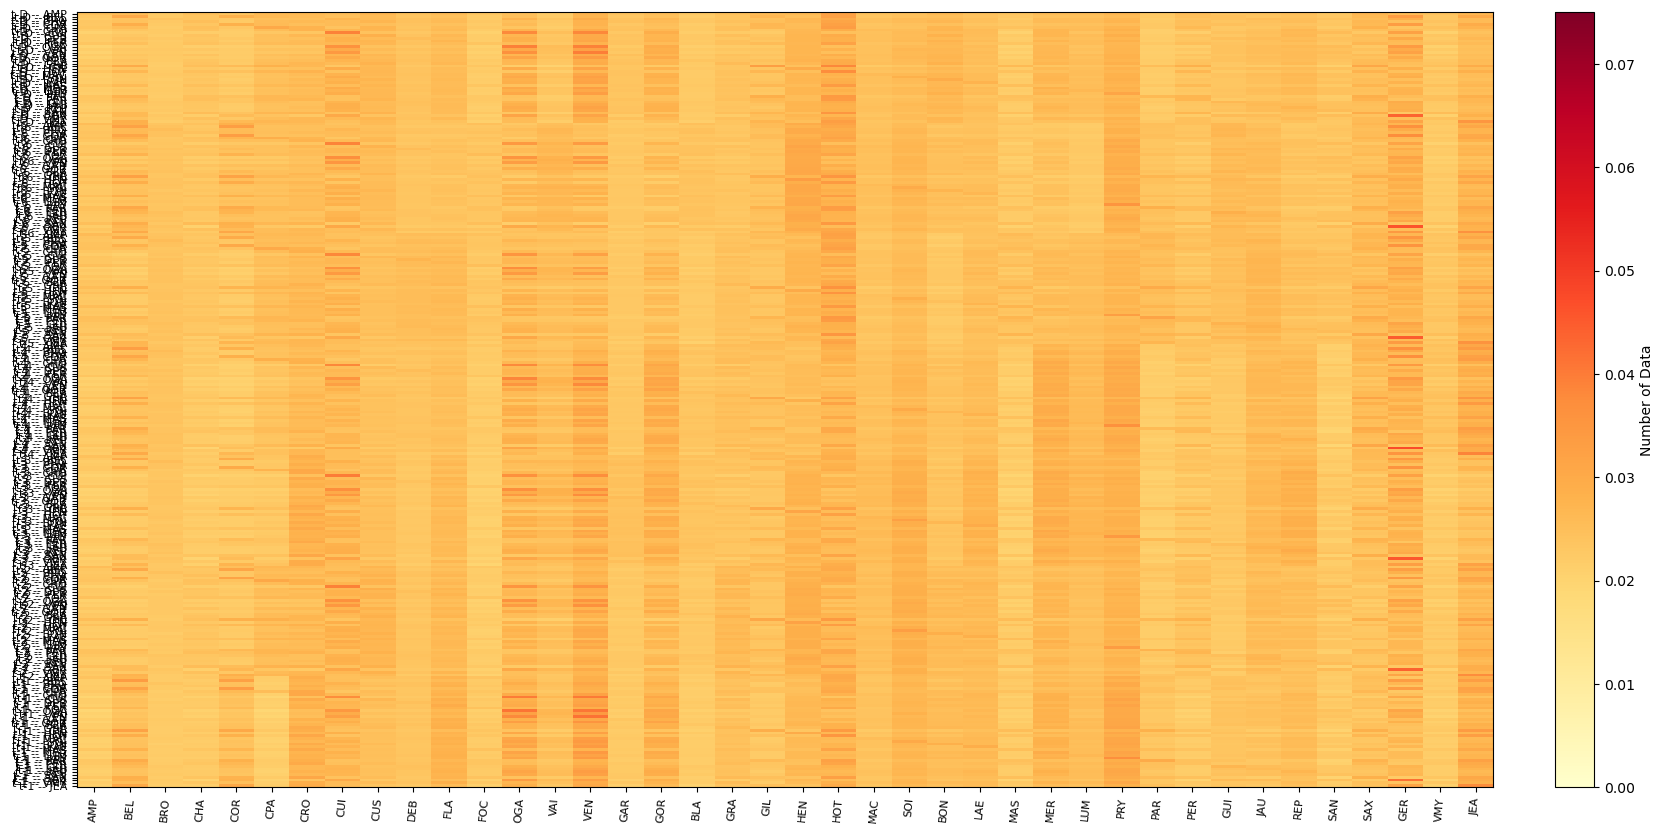

<Figure size 2000x1000 with 0 Axes>

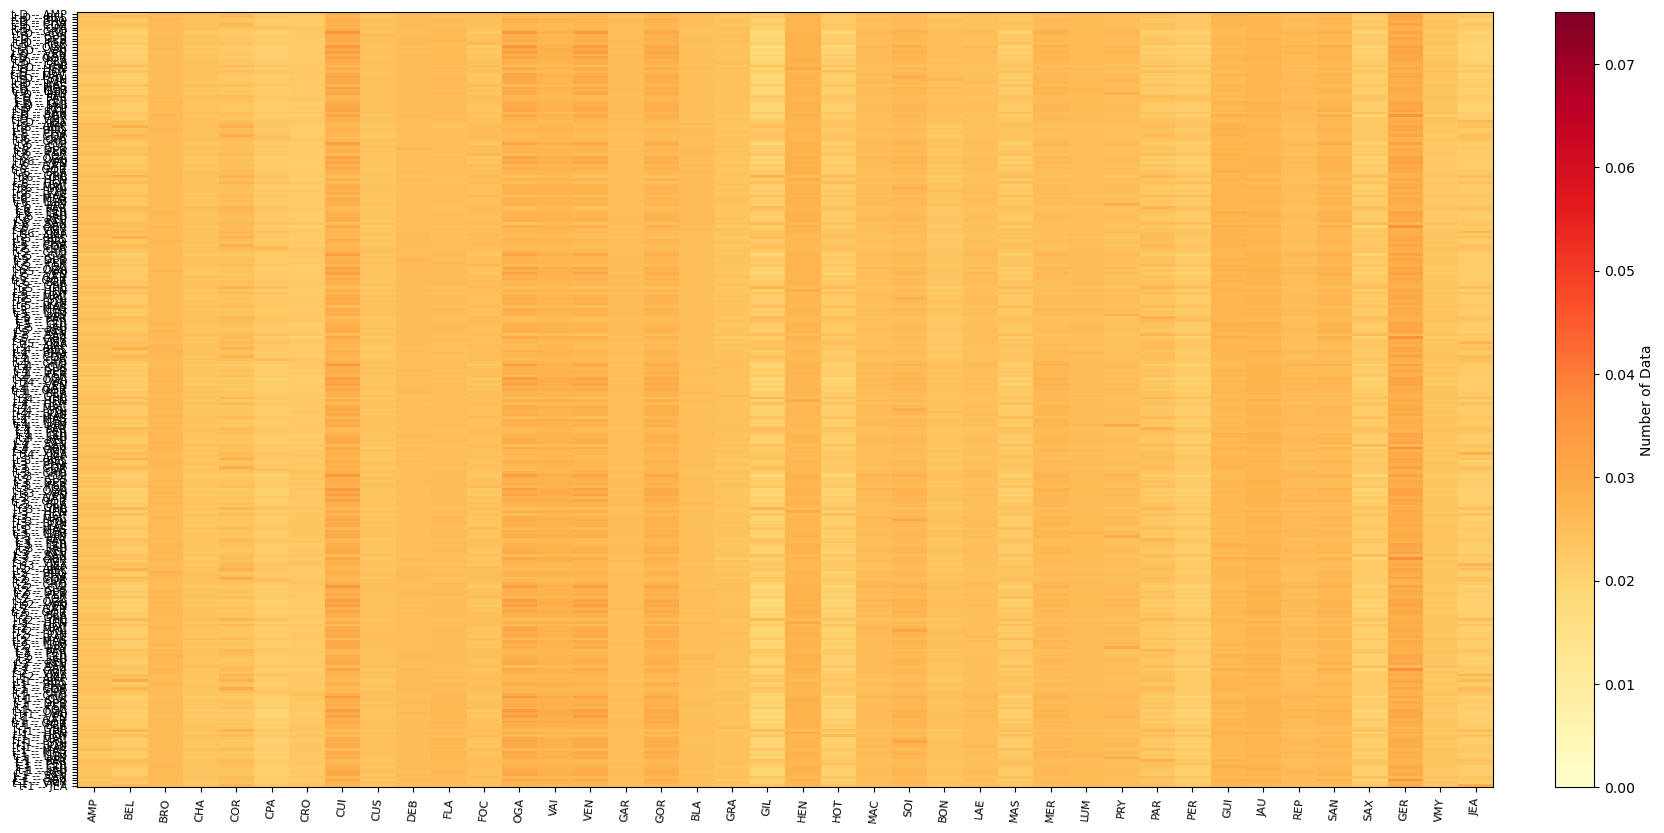

In [17]:
import torch 
from pipeline.plotting.plotting import plot_coverage_matshow
import matplotlib.pyplot as plt 
trainer1, trainer2 = L_trainer1[0],L_trainer2[0]


trainer = trainer1
args_init = args_init1
ds = ds1


X = torch.cat([x for x,y,x_c  in trainer.dataloader['test']]).to(args_init.device)
Y = torch.cat([y for x,y,x_c  in trainer.dataloader['test']]).to(args_init.device)
Xc0 = torch.cat([x_c[0] for x,y,x_c  in trainer.dataloader['test']]).to(args_init.device)
Xc1 = torch.cat([x_c[1] for x,y,x_c  in trainer.dataloader['test']]).to(args_init.device)
model = trainer.model
model.eval()
with torch.no_grad():
    pred = model(X,[Xc0,Xc1])

columns = ['t-D','t-6','t-5','t-4','t-3','t-2','t-1']

if hasattr(trainer.model,'_orig_mod'):
   t_layers = trainer.model._orig_mod.core_model.attn_layers_t
else:
   t_layers = trainer.model.core_model.attn_layers_t
for temporal_layer in range(len(t_layers)):
  attn_score = t_layers[temporal_layer].attn.attn_score.detach().cpu()     # attn_score.size : torch.Size([19956, 40, 7, 7]) - - [B,N,L,L] 
  print(attn_score.size(),'Std on dim 1: ',attn_score.std(1).mean().item(),'Min/Max: ',attn_score.mean(0).min().item(),attn_score.mean(0).max().item())
  mean_attn_score = attn_score.mean(0)                                                                             #  mean_attn_score.size(): [40, 7, 7]             - -   [N,L,L]
  df_attn_weight = pd.DataFrame(mean_attn_score.reshape(-1,mean_attn_score.shape[-1]).numpy(),columns=columns,index=[f"{hist} -- {station_name}"   for station_name in ds.spatial_unit for hist in columns] )
  figsize=(20,10)
  matfig = plt.figure(figsize=figsize)
  plot_coverage_matshow(df_attn_weight, cmap ="YlOrRd", save = None, cbar_label =  "Number of Data",bool_reversed=False,
                          v_min=0,v_max=3*(1/df_attn_weight.shape[1]),
                          #   display_values = False,
                            bool_plot = True,
                            cbar_magic_args = True,
                            figsize = figsize
  )


t_columns = ['t-D','t-6','t-5','t-4','t-3','t-2','t-1']

if hasattr(trainer.model,'_orig_mod'):
   s_layers = trainer.model._orig_mod.core_model.attn_layers_s
else:
   s_layers = trainer.model.core_model.attn_layers_s

for temporal_layer in range(len(s_layers)):
  attn_score = s_layers[temporal_layer].attn.attn_score.detach().cpu()
  print(attn_score.size(),'Std on dim 1: ',attn_score.std(1).mean().item(),'Min/Max: ',attn_score.mean(0).min().item(),attn_score.mean(0).max().item())
  mean_attn_score = attn_score.mean(0)
  df_attn_weight = pd.DataFrame(mean_attn_score.reshape(-1,mean_attn_score.shape[-1]).numpy(),columns=ds.spatial_unit,index=[f"{hist} -- {station_name}"   for hist in t_columns  for station_name in ds.spatial_unit] )
  figsize=(20,10)
  matfig = plt.figure(figsize=figsize)
  plot_coverage_matshow(df_attn_weight, cmap ="YlOrRd", save = None, cbar_label =  "Number of Data",bool_reversed=False,
                           v_min=0,v_max=3*(1/df_attn_weight.shape[1]),
                          #   display_values = False,
                            bool_plot = True,
                            cbar_magic_args = True,
                            figsize = figsize
  )

<Figure size 2000x1000 with 0 Axes>

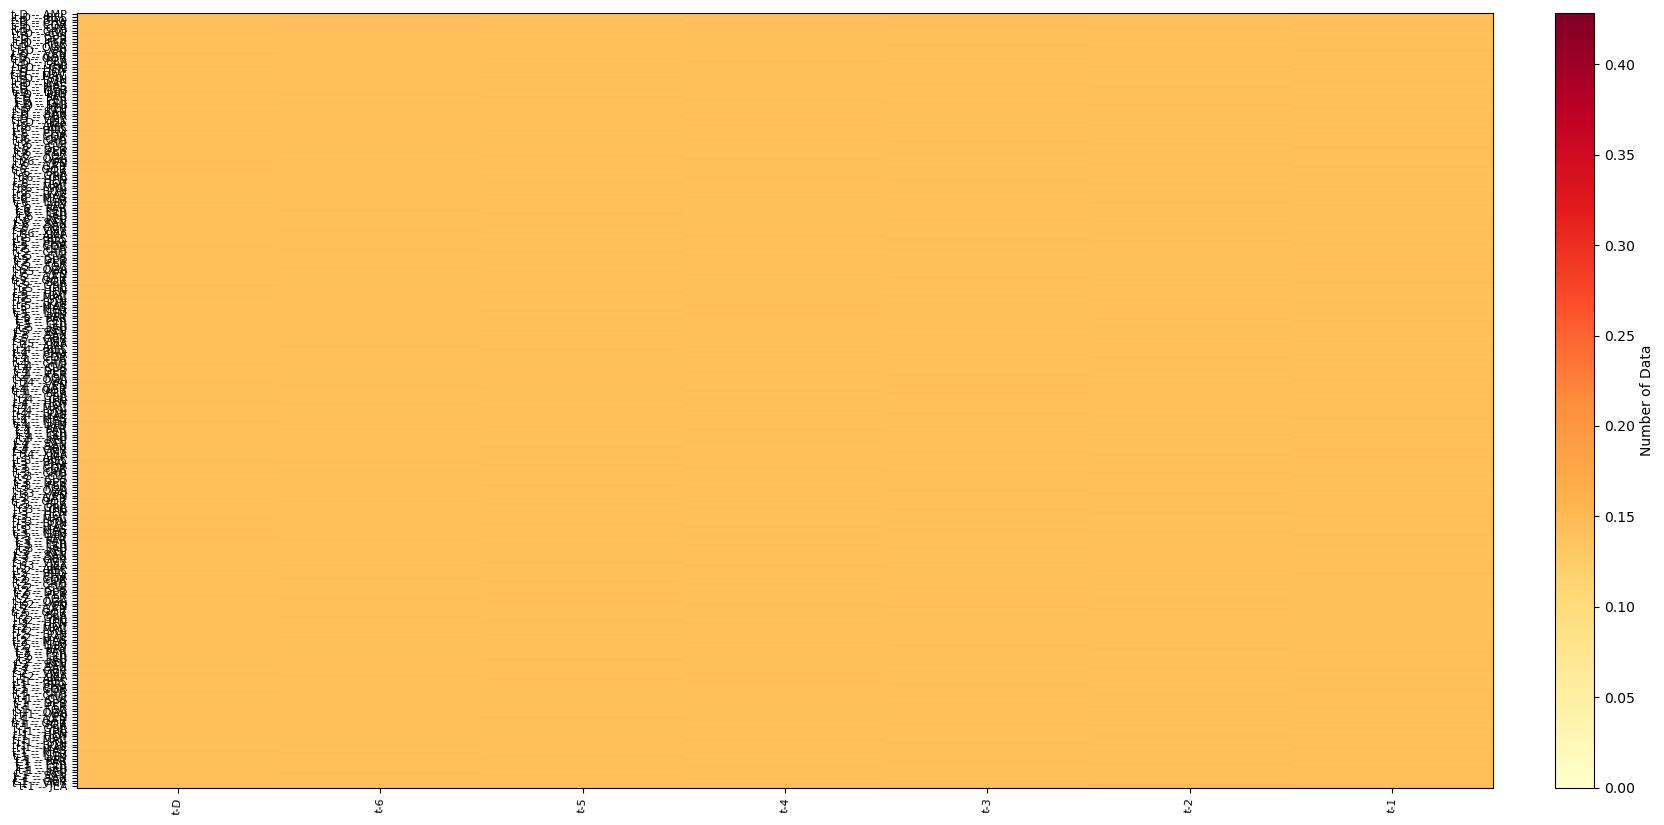

<Figure size 2000x1000 with 0 Axes>

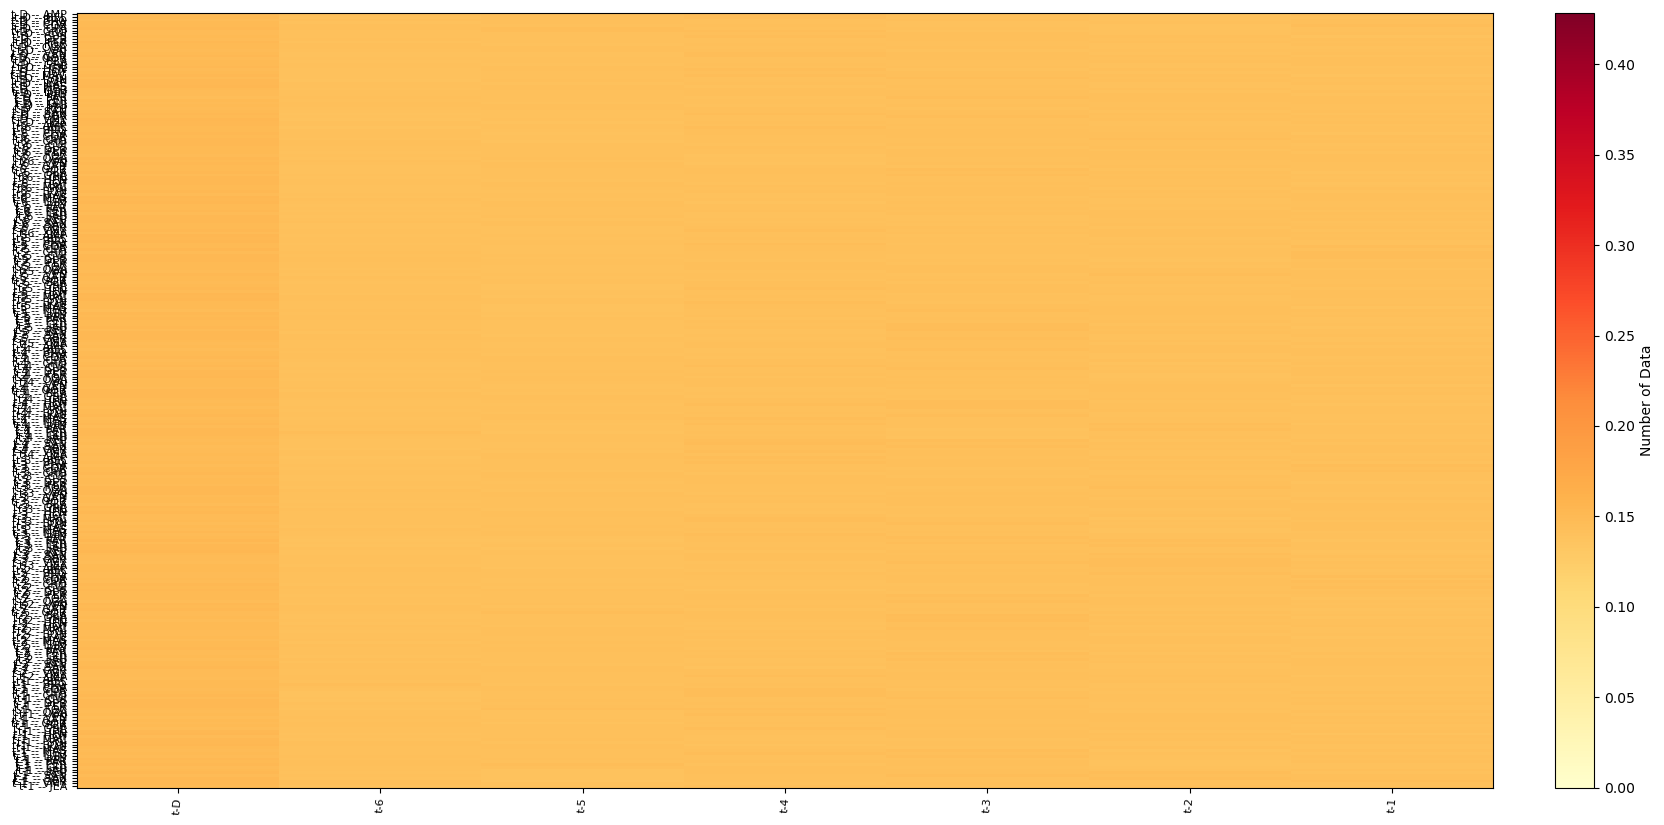

<Figure size 2000x1000 with 0 Axes>

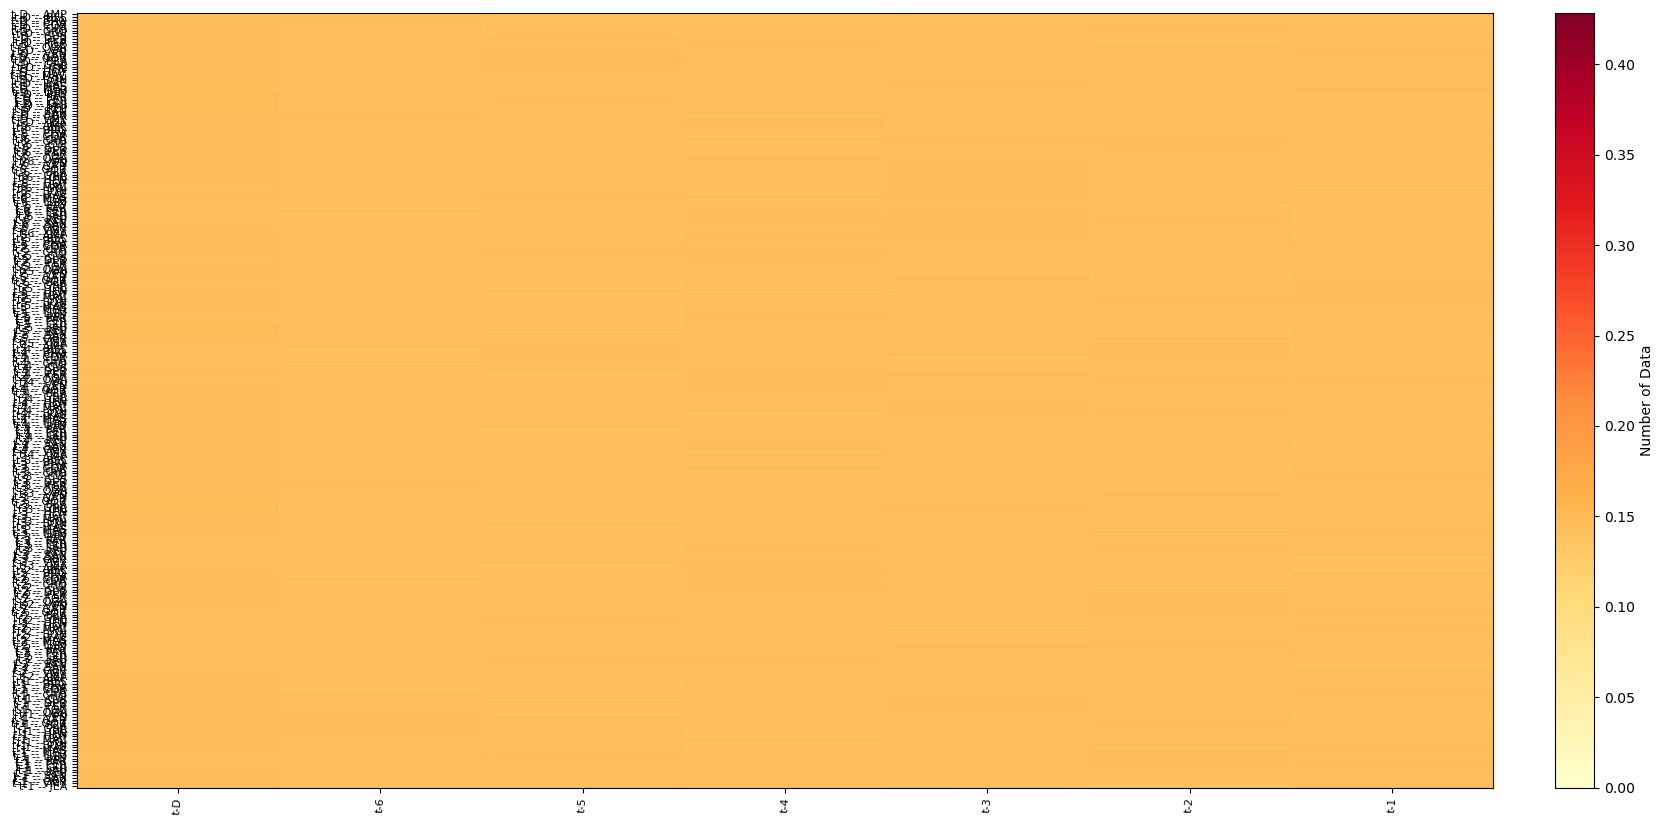

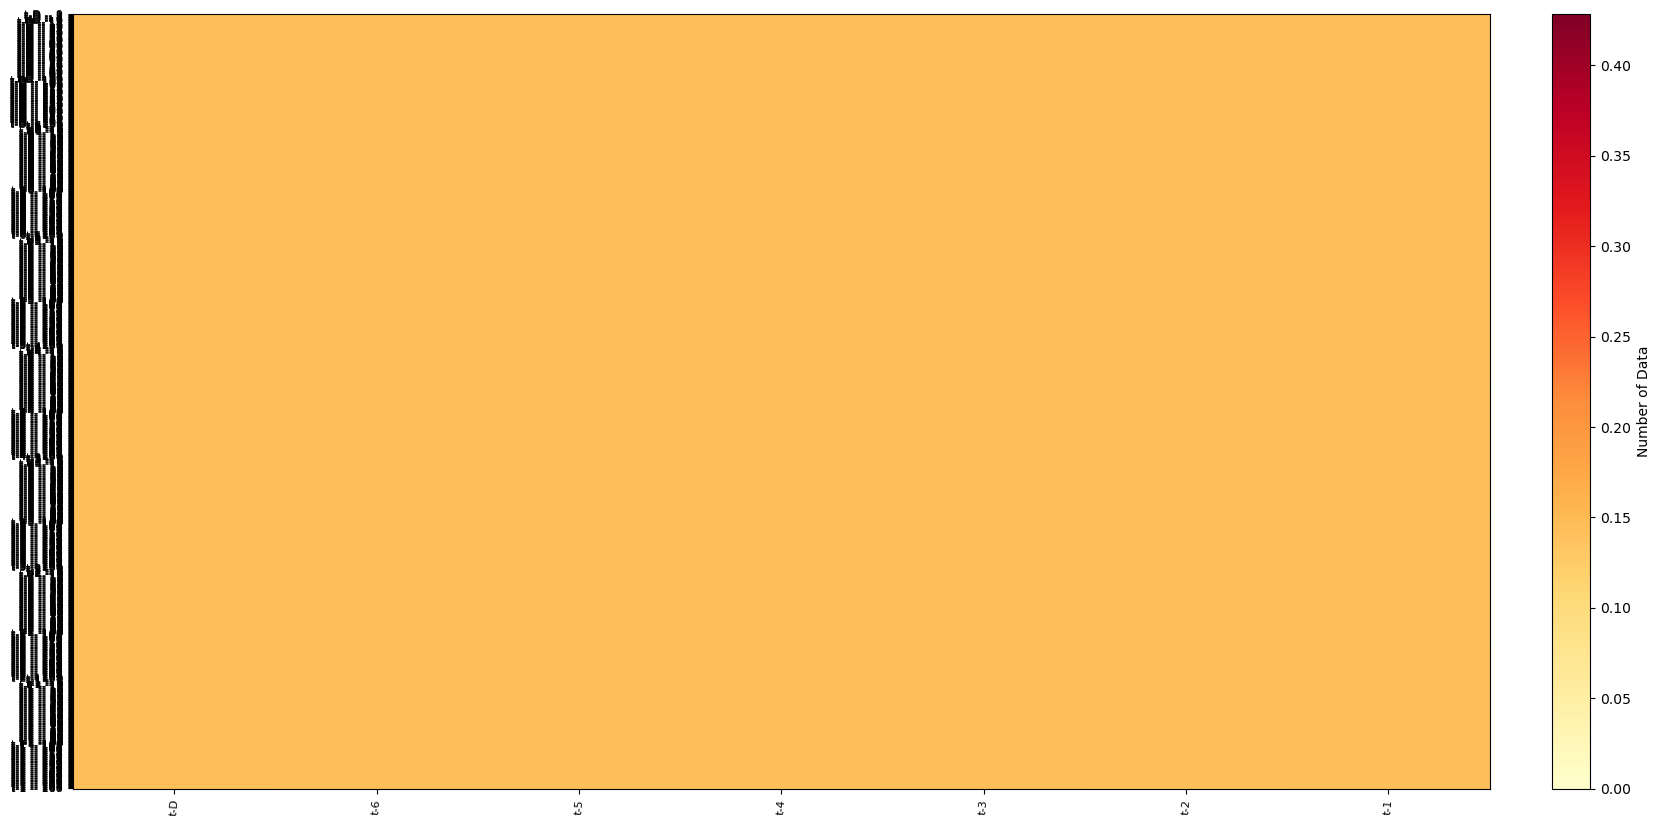

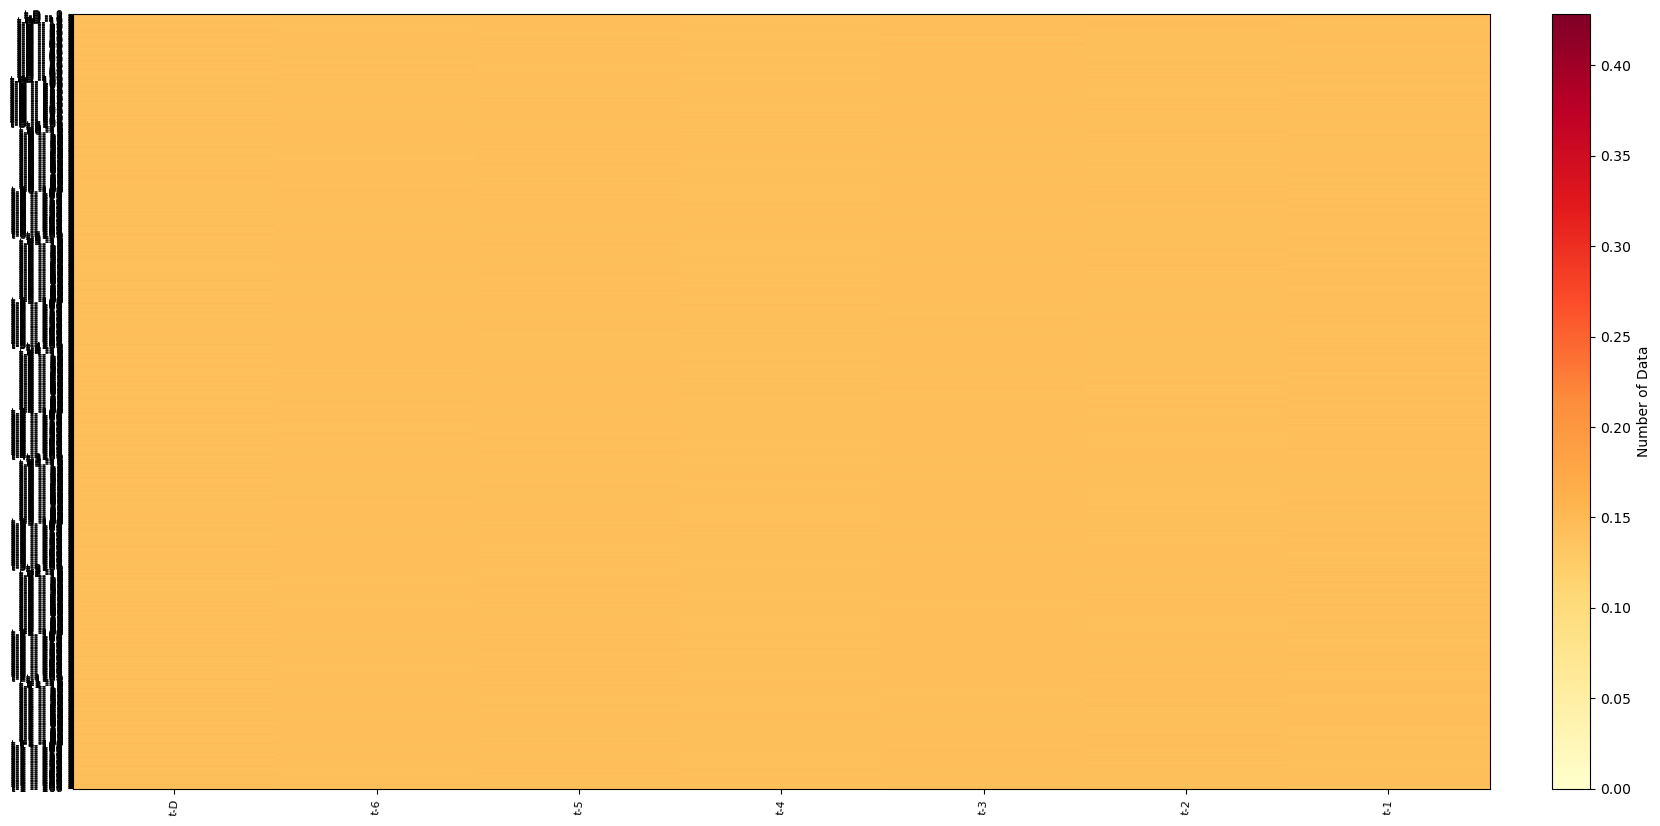

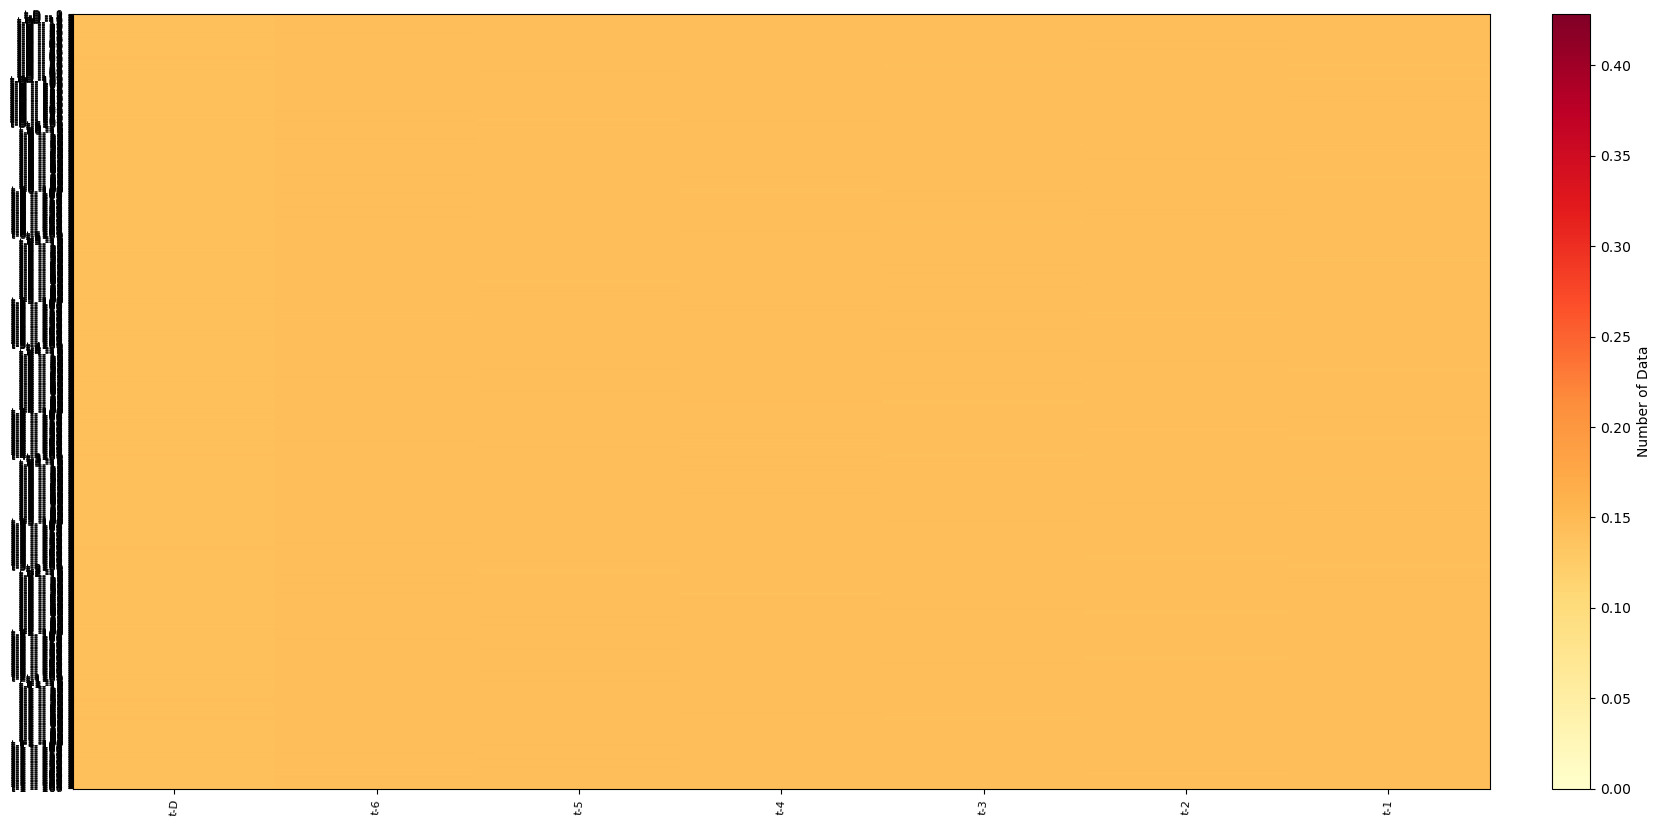

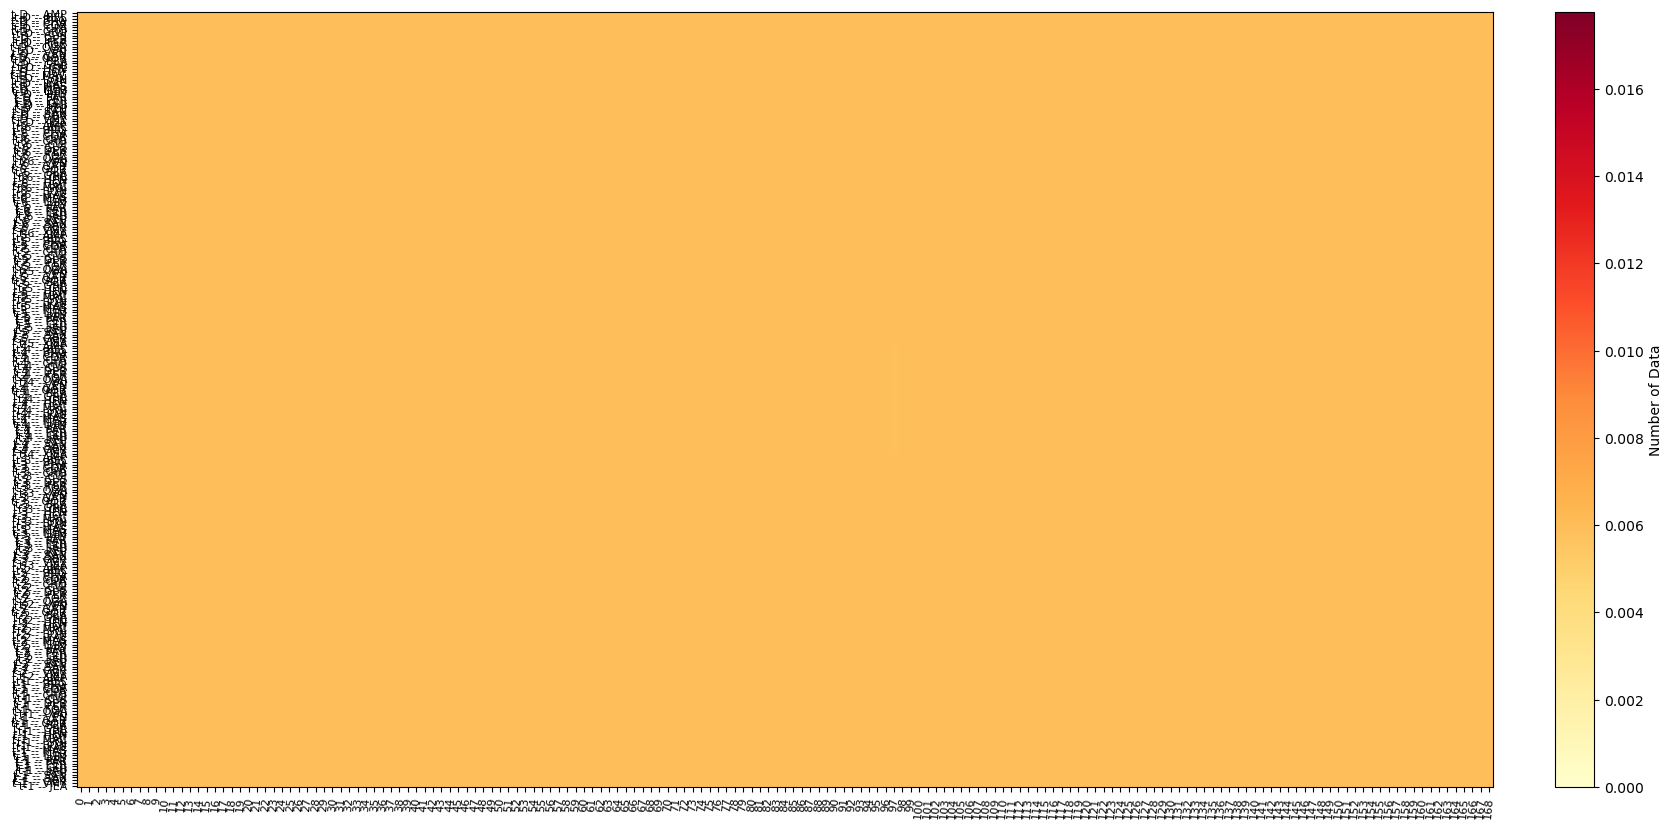

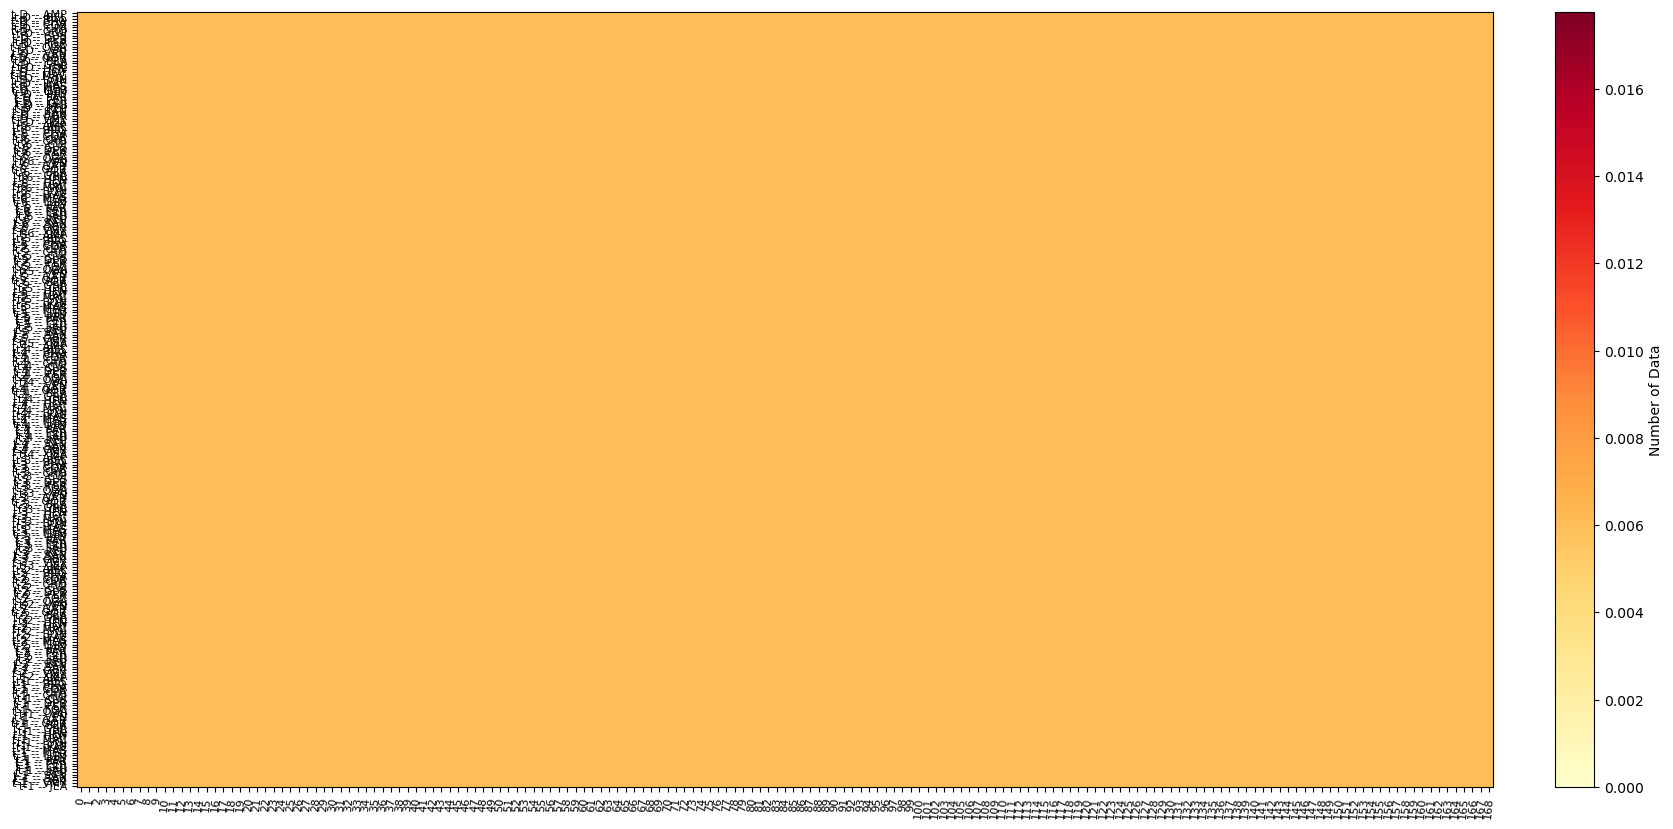

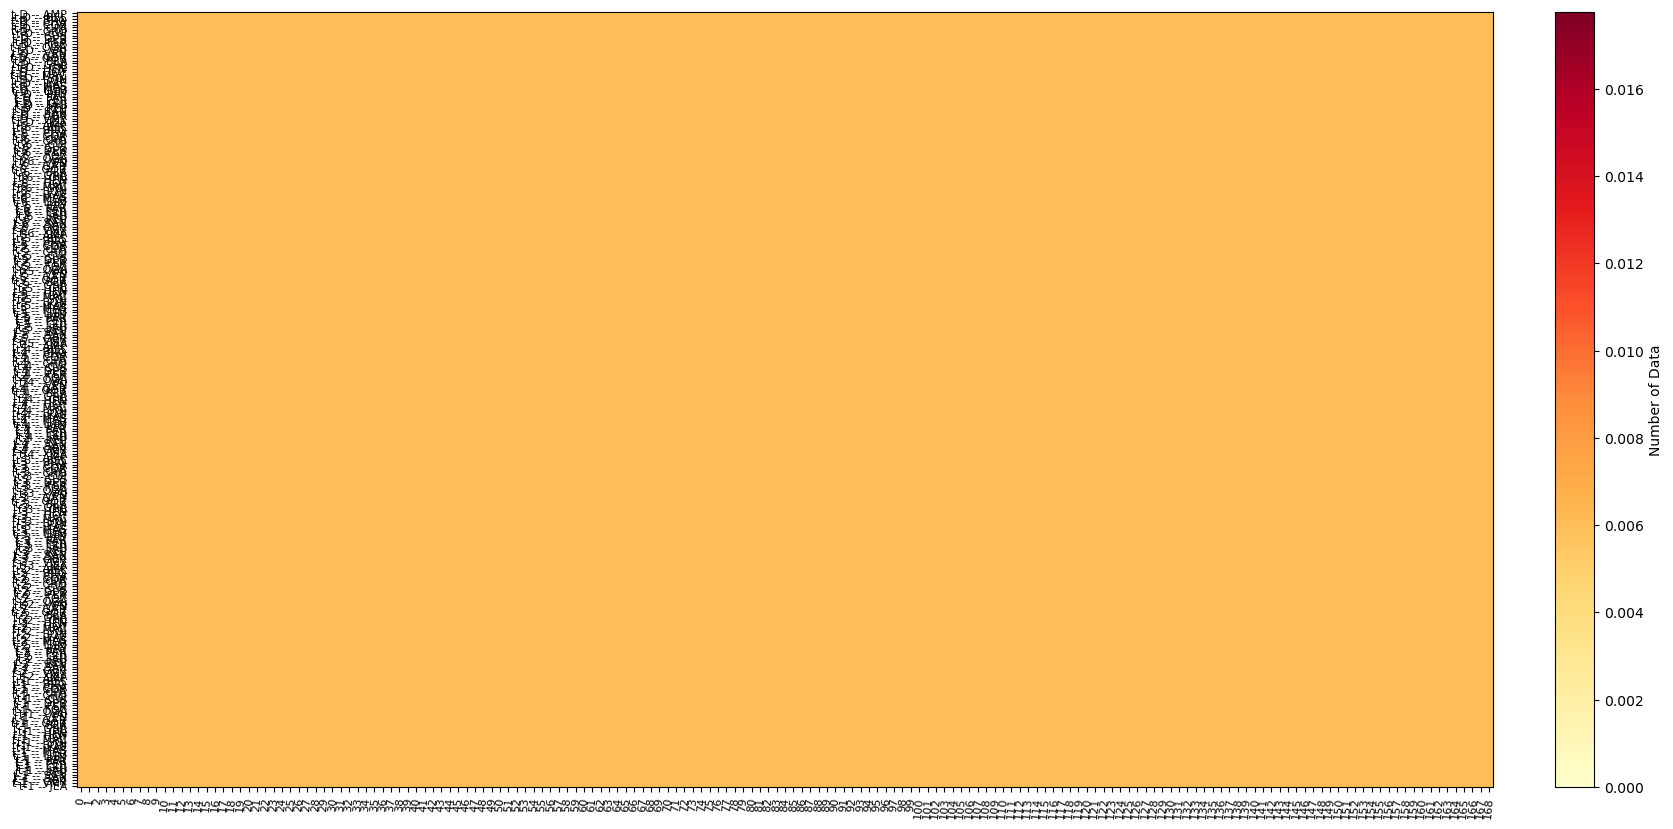

In [6]:
trainer = trainer2
ds = ds2
args_init = args_init2 
ds_name = 'netmob_POIs'
t_columns = ['t-D','t-6','t-5','t-4','t-3','t-2','t-1']

# Forward on test set to get Attention weights: 
all_data = [tensors for tensors in zip(*trainer.dataloader['test'])]
X = torch.cat(all_data[0]).to(args_init.device)
Y = torch.cat(all_data[1]).to(args_init.device)
Xc = [torch.cat(context_tensors).to(args_init.device) for context_tensors in zip(*all_data[2])]
model = trainer.model
model.eval()
with torch.no_grad():
    pred = model(X, Xc)
# ---

if hasattr(trainer.model.global_s_attn[f'{ds_name}'].model,'Q_attn_layers_t'):
    Q_attn_layers_t = trainer.model.global_s_attn[f'{ds_name}'].model.Q_attn_layers_t
    KV_attn_layers_t = trainer.model.global_s_attn[f'{ds_name}'].model.KV_attn_layers_t
    attn_layers_s = trainer.model.global_s_attn[f'{ds_name}'].model.attn_layers_s
else:
    attn_layers_t = trainer.model.global_s_attn[f'{ds_name}'].model.attn_layers_t
    attn_layers_s = trainer.model.global_s_attn[f'{ds_name}'].model.attn_layers_s


# --- Analysis of ST-Attention Weights associated to the contextual datasets: ---
for mha_layer in range(len(Q_attn_layers_t)):
    attn_score = Q_attn_layers_t[mha_layer].attn.attn_score.detach().cpu()
    mean_attn_score = attn_score.mean(0)
    df_attn_weight = pd.DataFrame(mean_attn_score.reshape(-1,mean_attn_score.size(-1)).numpy(),
                                columns = t_columns,
                                index = [f"{hist} -- {s_unit}" for hist in t_columns for s_unit in ds.spatial_unit] )  # args_init.contextual_kwargs['netmob_POIs']['spatial_unit']
    figsize=(20,10)
    matfig = plt.figure(figsize=figsize)
    plot_coverage_matshow(df_attn_weight, cmap ="YlOrRd", save = None, cbar_label =  "Number of Data",bool_reversed=False, v_min=0,v_max=3*(1/df_attn_weight.shape[1]),bool_plot = True, cbar_magic_args = True, figsize = figsize)
    
    # ---

for mha_layer in range(len(KV_attn_layers_t)):
    attn_score = KV_attn_layers_t[mha_layer].attn.attn_score.detach().cpu()
    mean_attn_score = attn_score.mean(0)
    df_attn_weight = pd.DataFrame(mean_attn_score.reshape(-1,mean_attn_score.size(-1)).numpy(),
                                columns = t_columns,
                                index = [f"{hist} -- {s_unit}" for hist in t_columns for s_unit in args_init.contextual_kwargs['netmob_POIs']['spatial_unit']] )  # 
    plot_coverage_matshow(df_attn_weight, cmap ="YlOrRd", save = None, cbar_label =  "Number of Data",bool_reversed=False, v_min=0,v_max=3*(1/df_attn_weight.shape[1]),bool_plot = True, cbar_magic_args = True, figsize = figsize)
    # ---


for mha_layer in range(len(attn_layers_s)):
    attn_score = attn_layers_s[mha_layer].attn.attn_score.detach().cpu()
    mean_attn_score = attn_score.mean(0)
    df_attn_weight = pd.DataFrame(mean_attn_score.reshape(-1,mean_attn_score.size(-1)).numpy(),
                                columns = args_init.contextual_kwargs[ds_name]['spatial_unit'],
                                index =[f"{hist} -- {s_unit}"   for hist in columns for s_unit in ds.spatial_unit] )
    plot_coverage_matshow(df_attn_weight, cmap ="YlOrRd", save = None, cbar_label =  "Number of Data",bool_reversed=False, v_min=0,v_max=3*(1/df_attn_weight.shape[1]),bool_plot = True, cbar_magic_args = True, figsize = figsize)
    
    # ---


# Adaptive Query 
```
adaptive_Q.size() = torch.Size([7, 40, 24])
```

- Abscisse: Query Dim (24)
- Orodnnée: prod(['t-D', 't-6', 't-5', 't-4', 't-3', 't-2', 't-1'] * spatial-units)

In [11]:
adaptive_Q = trainer.model.global_s_attn.netmob_POIs.model.init_adaptive_query
adaptive_Q.size()

torch.Size([7, 40, 24])

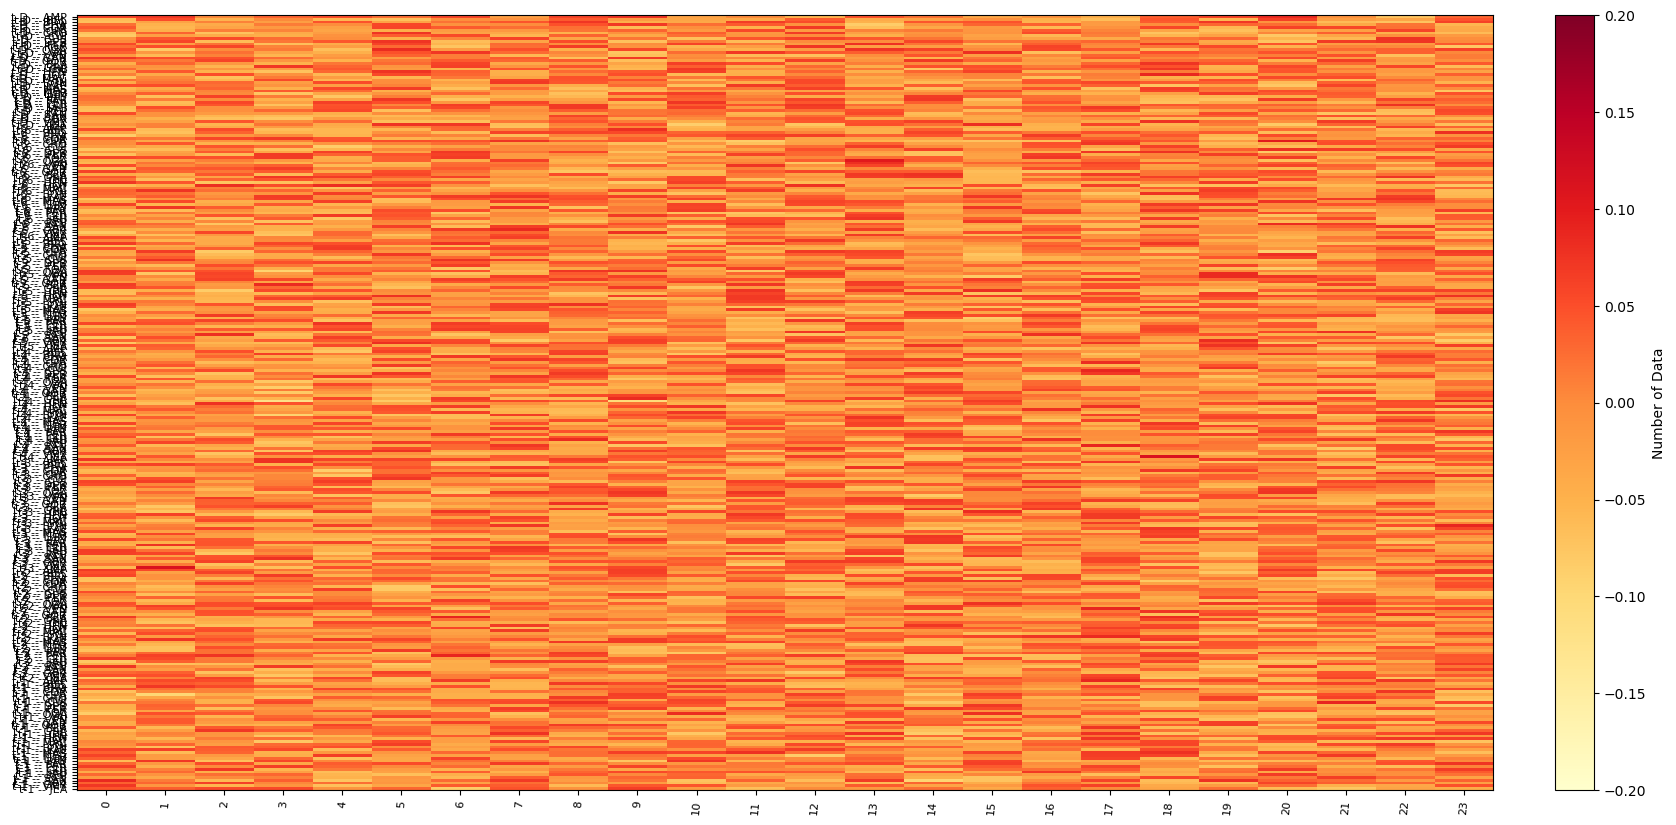

In [13]:
adaptive_Q = trainer.model.global_s_attn.netmob_POIs.model.init_adaptive_query
# adaptive_Q = adaptive_Q.transpose(0,1)
adaptive_Q = adaptive_Q.reshape(-1,adaptive_Q.size(-1))
adaptive_Q = pd.DataFrame(adaptive_Q.detach().cpu().numpy(),
                                columns = np.arange(adaptive_Q.size(-1)),
                                index = [f"{hist} -- {s_unit}" for hist in t_columns for s_unit in ds.spatial_unit]
                                ) 

plot_coverage_matshow(adaptive_Q, cmap ="YlOrRd", save = None, 
                      cbar_label =  "Number of Data",bool_reversed=False, 
                    v_min=-0.2,v_max=0.2,
                      bool_plot = True, cbar_magic_args = True, figsize = figsize)

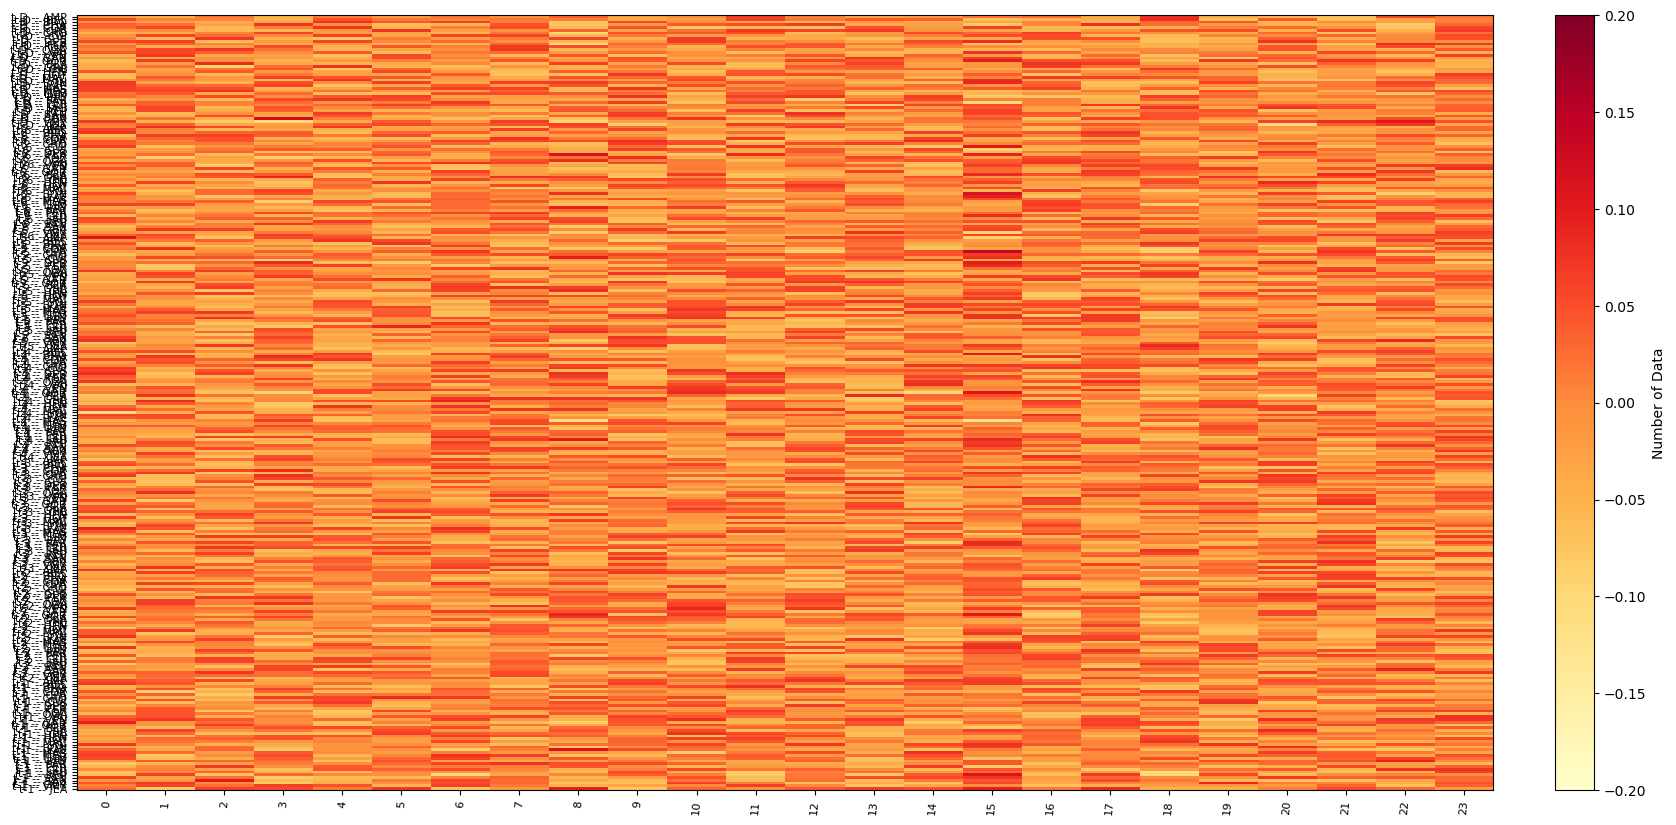

In [9]:
import numpy as np 

adaptive_Q = trainer.model.global_s_attn.netmob_POIs.model.init_adaptive_query
# adaptive_Q = adaptive_Q.transpose(0,1)
adaptive_Q = adaptive_Q.reshape(-1,adaptive_Q.size(-1))
adaptive_Q = pd.DataFrame(adaptive_Q.detach().cpu().numpy(),
                                columns = np.arange(adaptive_Q.size(-1)),
                                index = [f"{hist} -- {s_unit}" for hist in t_columns for s_unit in ds.spatial_unit]
                                ) 

plot_coverage_matshow(adaptive_Q, cmap ="YlOrRd", save = None, 
                      cbar_label =  "Number of Data",bool_reversed=False, 
                    v_min=-0.2,v_max=0.2,
                      bool_plot = True, cbar_magic_args = True, figsize = figsize)